## Data Profiling

Gathering descriptive statistics can be a tedious process. Gladly, there are libraries that exist that perform all of the data crunching for you. They output a very clear profile of your data. *pandas-profiling* is one of them. That library offers out-of-the-box statistical profiling of your dataset. Since the dataset we are using is tidy and standardized, we can use the library right away on our dataset.

We will use a dataset of Craft Beers from the CraftCans website. This dataset only contains data from canned beers from breweries in the United States. It’s not clear from the website if this dataset reports every single canned beer brewed in the US or not. To be safe, you will consider this dataset to be a sample that may contain biases.

In [1]:
import pandas as pd

In [2]:
beers = pd.read_csv("data/beers.csv")

breweries = pd.read_csv("data/breweries.csv")

beers_and_breweries = pd.merge(beers, 
                               breweries, 
                               how = 'inner', 
                               left_on="brewery_id", 
                               right_on="brewery_id", 
                               sort= True, 
                               suffixes=('_beer', '_brewery'))

beers_and_breweries.head()

tid    abv   ibu    id      name_beer               style  brewery_id  \
0  1493  0.045  50.0  2692   Get Together        American IPA           0   
1  1494  0.049  26.0  2691  Maggie's Leap  Milk / Sweet Stout           0   
2  1495  0.048  19.0  2690     Wall's End   English Brown Ale           0   
3  1496  0.060  38.0  2689        Pumpion         Pumpkin Ale           0   
4  1497  0.060  25.0  2688     Stronghold     American Porter           0   

   ounces        name_brewery         city state  
0    16.0  NorthGate Brewing   Minneapolis    MN  
1    16.0  NorthGate Brewing   Minneapolis    MN  
2    16.0  NorthGate Brewing   Minneapolis    MN  
3    16.0  NorthGate Brewing   Minneapolis    MN  
4    16.0  NorthGate Brewing   Minneapolis    MN

In [3]:
beers_and_breweries.dtypes

tid               int64
abv             float64
ibu             float64
id                int64
name_beer        object
style            object
brewery_id        int64
ounces          float64
name_brewery     object
city             object
state            object
dtype: object

In [4]:
# because we had a problem to import seaborn here is the solution from SO
#https://stackoverflow.com/questions/34973997/python-cant-import-seaborn

import sys
sys.path.append("/usr/local/lib/python2.7/site-packages")
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt


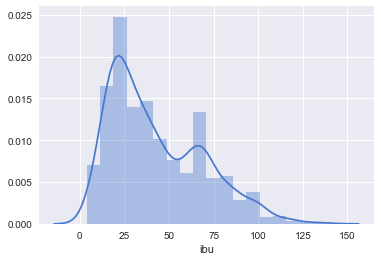

In [5]:
%matplotlib inline

sns.set(color_codes=True)
sns.set_palette(sns.color_palette("muted"))

sns.distplot(beers_and_breweries["ibu"].dropna());


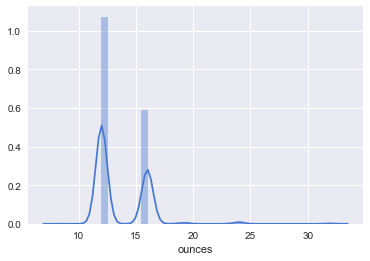

In [6]:
sns.distplot(beers_and_breweries["ounces"].dropna());

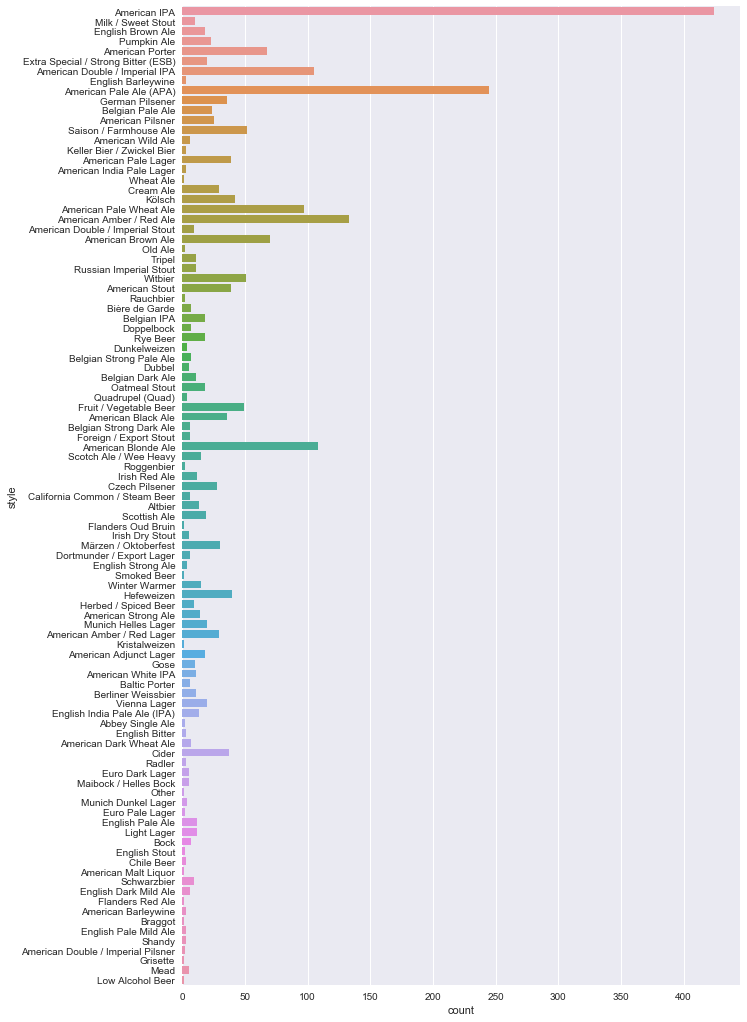

In [7]:
plt.subplots(figsize=(10, 18))
sns.countplot(y=beers_and_breweries["style"]);

In [8]:
beers_and_breweries[["style", "name_beer"]].describe()

style        name_beer
count           2405             2410
unique            99             2305
top     American IPA  Nonstop Hef Hop
freq             424               12

In [9]:
import pandas_profiling as pf

/usr/local/Cellar/python3/3.6.3/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [10]:
pf.ProfileReport(beers_and_breweries)

In [11]:
report = pf.ProfileReport(beers_and_breweries)

In [12]:
description = report.get_description()
description

{'correlations': {'pearson':                  tid       abv       ibu        id  brewery_id    ounces
  tid         1.000000  0.006547  0.019885 -0.077488   -0.012088  0.037981
  abv         0.006547  1.000000  0.670621  0.042811   -0.098632  0.172529
  ibu         0.019885  0.670621  1.000000  0.000485   -0.004875  0.054691
  id         -0.077488  0.042811  0.000485  1.000000   -0.504030  0.100843
  brewery_id -0.012088 -0.098632 -0.004875 -0.504030    1.000000 -0.133762
  ounces      0.037981  0.172529  0.054691  0.100843   -0.133762  1.000000,
  'spearman':                  tid       abv       ibu        id  brewery_id    ounces
  tid         1.000000 -0.007037  0.008871 -0.078567   -0.006594  0.026093
  abv        -0.007037  1.000000  0.667780  0.041962   -0.097120  0.173042
  ibu         0.008871  0.667780  1.000000  0.003784    0.008311  0.054958
  id         -0.078567  0.041962  0.003784  1.000000   -0.506097  0.089073
  brewery_id -0.006594 -0.097120  0.008311 -0.506097    1.00

In [13]:
dirty_beers_breweries = pd.read_csv("data/dirty-beers-and-breweries-2.csv")
dirty_beers_breweries.head(20)

tid    id                beer-name                       style    ounces  \
0   1737  2580                     Gose                        Gose  16.0 oz.   
1   1776  1552      Dog Days Summer Ale                      Kölsch  12.0 oz.   
2   1793  1073      Epicenter Amber Ale    American Amber / Red Ale  12.0 oz.   
3    182  2593       Grapefruit Sculpin                American IPA  12.0 oz.   
4   1909    21            Pikeland Pils             German Pilsener  12.0 oz.   
5   2082    14                     Hell  Keller Bier / Zwickel Bier  16.0 oz.   
6   2106  1196  Wild Plum Farmhouse Ale      Saison / Farmhouse Ale  16.0 oz.   
7    217  2494                   Oberon     American Pale Wheat Ale  12.0 oz.   
8   2171  1780          Rise to the Top                   Cream Ale  12.0 oz.   
9   2173  2421           Watermelon Ale      Fruit / Vegetable Beer  12.0 oz.   
10  2381  2149  #001 Golden Amber Lager  American Amber / Red Lager  12.0 oz.   
11   992  2143               3 Scrooges               Winter Warmer  16.0 oz.   
12  2041  2000   Fistful of Hops Orange                American IPA  16.0 oz.   
13  1050    96        Annie's Amber Ale    American Amber / Red Ale  12.0 oz.   
14  1071   501                 Pale Dog     American Pale Ale (APA)  12.0 oz.   
15  1265  1356      Monk from the 'Yunk                      Tripel  12.0 oz.   
16  1277  1716               Sexy Chaos      Russian Imperial Stout  16.0 oz.   
17  1309   313               Mana Wheat     American Pale Wheat Ale  12.0 oz.   
18  1312    31            Big Swell IPA                American IPA  12.0 oz.   
19  1320  2185              Tsunami IPA                American IPA  12.0 oz.   

                      abv   ibu  brewery_id                    brewery-name  \
0                  0.035%   NaN          42     Rising Tide Brewing Company   
1                  0.045%  28.0         164              Round Guys Brewing   
2                  0.055%  20.0          30          SanTan Brewing Company   
3                   0.07%   NaN          34   Ballast Point Brewing Company   
4                  0.049%  44.0         371         Sly Fox Brewing Company   
5                  0.051%  20.0          61           Surly Brewing Company   
6   0.055999999999999994%  20.0          45       Tallgrass Brewing Company   
7   0.057999999999999996%   NaN          76                  Bell's Brewery   
8   0.040999999999999995%   NaN         142          Third Street Brewhouse   
9                  0.051%  11.0         108   Thomas Hooker Brewing Company   
10                 0.055%   NaN         211       Wisconsin Brewing Company   
11                 0.065%   NaN         124    Griffin Claw Brewing Company   
12                  0.063  75.0          25        Sun King Brewing Company   
13                  0.055   NaN         500    High Noon Saloon And Brewery   
14                   0.06  50.0         395            Hops & Grain Brewery   
15                   0.09  30.0         356        Manayunk Brewing Company   
16                  0.099   NaN         317  Marshall Wharf Brewing Company   
17                  0.055  15.0         375            Maui Brewing Company   
18                  0.062  65.0         375            Maui Brewing Company   
19    0.07200000000000001  75.0         203              Mehana Brewing Co.   

               city state  
0          Portland    ME  
1          Lansdale    PA  
2          Chandler    AZ  
3         San Diego    CA  
4         Pottstown    PA  
5   Brooklyn Center    MN  
6         Manhattan    KS  
7         Kalamazoo    MI  
8       Cold Spring    MN  
9        Bloomfield    CT  
10           Verona    WI  
11       Birmingham    MI  
12  Indianapolis IN   NaN  
13      Leavenworth    KS  
14           Austin    TX  
15     Philadelphia    PA  
16          Belfast    ME  
17          Lahaina    HI  
18          Lahaina    HI  
19             Hilo    HI

In [14]:
pf.ProfileReport(dirty_beers_breweries)

In [15]:
profile_dirty = pf.ProfileReport(dirty_beers_breweries)
dirty_description = profile_dirty.get_description()
dirty_description

{'correlations': {'pearson':                  tid        id       ibu  brewery_id
  tid         1.000000 -0.077488  0.019885   -0.012088
  id         -0.077488  1.000000  0.000485   -0.504030
  ibu         0.019885  0.000485  1.000000   -0.004875
  brewery_id -0.012088 -0.504030 -0.004875    1.000000,
  'spearman':                  tid        id       ibu  brewery_id
  tid         1.000000 -0.078567  0.008871   -0.006594
  id         -0.078567  1.000000  0.003784   -0.506097
  ibu         0.008871  0.003784  1.000000    0.008311
  brewery_id -0.006594 -0.506097  0.008311    1.000000},
 'freq': {'abv': 0.05                     150
  0.055                    112
  0.06                      92
  0.065                     86
  0.052000000000000005      80
  0.05%                     65
  0.045                     64
  0.07                      62
  0.048                     50
  0.053                     47
  0.055%                    46
  0.062                     44
  0.051              

In [16]:
%matplotlib inline
#represent cumulative distribution functions (CDFs) derived from data points.
import numpy as np

num_bins = 10
data= np.asarray( dirty_beers_breweries["ibu"].dropna().values)
counts, bin_edges = np.histogram (data, bins=num_bins, normed=True)
cdf = np.cumsum (counts)
plt.plot (bin_edges[1:], cdf/cdf[-1])


In [17]:
for q in [50, 90, 95, 100]:
    print("{}% percentile: {}".format (q, np.percentile(dirty_beers_breweries["ibu"].dropna().values, q)))


50% percentile: 35.0
90% percentile: 80.0
95% percentile: 92.0
100% percentile: 138.0


In [18]:
from scipy import stats

ibu_vals=dirty_beers_breweries["ibu"].dropna().values
# A trimmed mean (sometimes called a truncated mean) is 
# similar to a mean, but it trims any outliers. 
# Trim 10% at both ends and compute the trimmed mean:
trimmed_mean= stats.trim_mean(ibu_vals, 0.1)
trimmed_mean

40.144888888888886

In [19]:
mean= np.mean(ibu_vals)
mean

42.713167259786474

In [23]:
from scipy import stats
#pattern length data: from the address dataset:
patterns_length_counts = [ 16, 26, 16, 27, 20, 19, 14, 14, 16, 32, 21, 25, 19, 27, 17, 23, 14, 16, 15, 13, 20, 12, 20, 16, 15, 12, 17, 17, 24, 13, 15, 17, 21, 21, 17, 19, 11, 19, 27, 16, 18, 16, 20, 15, 24, 20, 16, 20, 25, 17, 35, 14, 19, 18, 17, 17, 14, 10, 27, 15, 20, 13, 19, 28, 23, 18, 15, 24, 18, 21, 13, 15, 16, 20, 14, 16, 11, 22, 14, 16, 16, 12, 32, 15, 25, 19, 24, 16, 26, 22, 13, 16, 17, 17, 20, 16, 21, 17, 18, 21, 17, 15, 17, 22, 27, 17, 22, 12, 17, 18, 25, 20, 23, 23, 16, 21, 11, 25, 23, 20, 17, 15, 14, 16, 24, 25, 22, 22, 16, 23, 15, 16, 11, 25, 18, 15, 17, 12, 24, 16, 21, 25, 22, 14, 16, 12, 17, 22, 16, 16, 17, 30, 19, 26, 15, 14, 21, 14, 16, 20, 16, 15, 22, 19, 20, 14, 18, 25, 18, 34, 19, 12, 16, 24, 11, 14, 13, 19, 17, 18, 15, 14, 13, 17, 16, 23, 13, 13, 15, 17, 21, 28, 23, 27, 22, 16, 28, 16, 16, 24, 13, 16, 18, 12, 14, 19, 17, 22, 17, 19, 14, 14, 13, 17, 19, 18, 18, 24, 20, 16, 27, 20, 13, 19, 15, 17, 18, 15, 22, 20, 38, 20, 14, 23, 28, 14, 17, 15, 26, 16, 15, 15, 24, 21, 18, 18, 13, 18, 20, 15, 22, 23, 21, 25, 13, 15, 16, 14, 17, 18, 15, 17, 10, 18, 19, 18, 26, 16, 21, 16, 14, 17, 21, 20, 19, 15, 12, 13, 18, 19, 17, 10, 16, 20, 15, 20, 16, 12, 19, 12, 27, 27, 19, 16, 15, 15, 20, 17, 19, 17, 18, 13, 17, 16, 22, 14, 15, 15, 16, 15, 21, 19, 9, 22, 14, 15, 17, 17, 17, 18, 21, 20, 15, 19, 19, 14, 17, 15, 11, 18, 18, 14, 28, 16, 16, 16, 11, 18, 17, 23, 17, 23, 13, 11, 11, 24, 18, 20, 21, 24, 18, 25, 13, 21, 20, 16, 23, 14, 23, 17, 25, 15, 14, 15, 17, 16, 16, 17, 18, 16, 16, 24, 15, 14, 16, 14, 20, 15, 18, 20, 12, 21, 24, 17, 16, 18, 15, 23, 20, 14, 14, 15, 15, 14, 17, 17, 16, 22, 14, 13, 10, 18, 18, 24, 20, 14, 18, 15, 16, 19, 18, 15, 20, 23, 29, 14, 18, 15, 15, 17, 17, 19, 13, 14, 13, 19, 22, 23, 18, 16, 21, 15, 27, 31, 25, 16, 15, 15, 11, 16, 25, 24, 16, 27, 15, 17, 22, 17, 17, 17, 35, 28, 12, 23, 14, 21, 18, 18, 14, 26, 14, 23, 15, 18, 16, 14, 16, 12, 24, 19, 17, 28, 19, 19, 21, 15, 16, 21, 19, 16, 18, 14, 26, 25, 19, 18, 22, 17, 20, 17, 13, 14, 21, 24, 15, 15, 16, 20, 15, 13, 24, 19, 21, 19, 14, 16, 9, 24, 30, 13, 14, 12, 16, 13, 20, 20, 17, 16, 15, 24, 11, 10, 23, 17, 16, 15, 11, 20, 15, 17, 20, 12, 21, 15, 15, 21, 20, 23, 17, 16, 22, 13, 17, 18, 16, 14, 16, 23, 22, 21, 18, 17, 22, 31, 20, 13, 15, 21, 13, 16, 16, 13, 15, 13, 17, 18, 15, 15, 17, 25, 11, 19, 17, 18, 19, 24, 24, 21, 15, 14, 18, 17, 24, 21, 13, 13, 15, 18, 19, 18, 17, 18, 19, 20, 19, 9, 19, 12, 23, 13, 16, 27, 18, 17, 14, 16, 19, 18, 23, 15, 20, 18, 16, 18, 17, 17, 18, 17, 21, 17, 21, 21, 23, 19, 17, 19, 13, 18, 16, 25, 13, 19, 23, 11, 17, 14, 16, 18, 17, 19, 17, 18, 16, 15, 11, 23, 17, 20, 20, 18, 25, 15, 18, 24, 22, 22, 34, 21, 31, 34, 17, 19, 17, 17, 14, 18, 18, 18, 11, 19, 14, 22, 19, 23, 14, 12, 29, 15, 18, 16, 17, 18, 16, 15, 13, 15, 29, 27, 14, 15, 22, 20, 14, 17, 16, 31, 14, 15, 29, 19, 35, 13, 15, 17, 13, 17, 25, 14, 14, 13, 15, 18, 16, 24, 22, 16, 18, 21, 19, 22, 33, 17, 16, 13, 16, 20, 15, 14, 20, 13, 22, 16, 16, 18, 16, 27, 14, 20, 28, 13, 27, 15, 19, 14, 18, 30, 14, 14, 20, 17, 20, 12, 27, 28, 14, 20, 27, 12, 28, 15, 21, 14, 14, 20, 18, 14, 29, 23, 19, 12, 15, 14, 19, 25, 16, 17, 13, 23, 18, 14, 11, 22, 9, 19, 19, 14, 21, 15, 16, 16, 13, 15, 26, 24, 11, 27, 15, 29, 19, 17, 26, 15, 18, 20, 19, 22, 16, 17, 19, 18, 21, 15, 24, 15, 19, 27, 15, 11, 16, 16, 24, 19, 15, 17, 20, 25, 14, 17, 15, 12, 14, 21, 22, 18, 26, 12, 23, 26, 21, 17, 14, 15, 21, 17, 18, 19, 15, 14, 18, 23, 20, 16, 16, 25, 26, 17, 24, 15, 15, 15, 18, 22, 16, 10, 19, 15, 16, 19, 14, 26, 17, 15, 14, 18, 18, 11, 29, 16, 17, 12, 12, 14, 18, 16, 16, 20, 18, 19, 23, 18, 17, 15, 18, 35, 19, 18, 14, 19, 19, 21, 19, 18, 17, 15, 10, 19, 23, 19, 16, 13, 14, 14, 19, 11, 14, 14, 20, 15, 22, 18, 31, 14, 17, 18, 18, 15, 15, 19, 21, 16, 17, 30, 18, 25, 20, 21, 16, 13, 20, 14, 12, 18, 16, 26, 16, 16, 14, 13, 27, 14, 16, 15, 17, 15, 15, 18, 20, 20, 24, 15, 18, 11, 21, 18, 15, 15, 21, 13, 22, 14, 11, 17, 14, 15, 21, 17, 25, 16, 22, 17, 24, 19, 15, 22, 19, 18, 17, 15, 15, 28, 15, 17, 16, 17, 18, 15, 17, 19, 14, 23, 12, 15, 20, 16, 15, 12, 14, 13, 14, 21, 17, 13, 20, 18, 25, 16, 20, 18, 38, 22, 12, 19, 15, 23, 31, 18, 17, 19, 18, 13, 19, 15, 15, 22, 17, 20, 20, 21, 23, 29, 16, 29, 16, 18, 22, 13, 11, 18, 15, 15, 16, 22, 10, 22, 19, 13, 22, 16, 15, 15, 24, 18, 29, 19, 11, 22, 16, 33, 30, 27, 24, 18, 15, 24, 21, 15, 18, 15, 21, 20, 16, 18, 13, 14, 14, 14, 18, 23, 12, 22, 27, 22, 18, 23, 16, 13, 15, 11, 23, 15, 12, 21, 22, 17, 14, 24, 15, 16, 14, 16, 14, 20, 15, 12, 20, 30, 14, 19, 15, 16, 20, 17, 13, 23, 12, 19, 25, 22, 17, 13, 21, 20, 18, 20, 25, 12, 24, 21, 21, 16, 18, 17, 16, 21, 17, 24, 17, 19, 33, 17, 23, 29, 24, 14, 21, 15, 17, 24, 18, 16, 19, 21, 12, 14, 21, 24, 13, 16, 18, 12, 15, 13, 19, 19, 19, 22, 14, 18, 15, 14, 14, 26, 15, 13, 22, 26, 18, 15, 30, 16, 17, 16, 17, 16, 22, 26, 13, 18, 15, 13, 12, 17, 17, 21, 16, 20, 20, 18, 25, 23, 27, 17, 27, 15, 26, 24, 21, 13, 13, 14, 13, 19, 29, 15, 16, 26, 21, 20, 16, 23, 21, 18, 15, 19, 17, 22, 16, 16, 24, 15, 16, 17, 13, 14, 17, 15, 16, 19, 14, 24, 20, 24, 26, 20, 21, 17, 20, 17, 15, 16, 15, 18, 15, 14, 19, 27, 19, 23, 25, 18, 33, 18, 15, 13, 17, 23, 15, 16, 19, 15, 15, 16, 25, 14, 24, 33, 17, 16, 14, 19, 22, 15, 18, 17, 16, 18, 15, 15, 16, 16, 11, 17, 13, 15, 26, 14, 15, 15, 14, 16, 14, 20, 11, 16, 16, 15, 16, 17, 25, 16, 18, 19, 24, 29, 20, 15, 21, 28, 22, 24, 24, 19, 20, 20, 16, 23, 14, 17, 25, 12, 17, 29, 19, 17, 16, 15, 16, 17, 24, 22, 23, 11, 13, 15, 21, 17, 13, 17, 23, 15, 16, 19, 16, 14, 24, 17, 22, 15, 14, 16, 13, 16, 17, 22, 15, 17, 17, 14, 19, 18, 13, 12, 18, 17, 21, 19, 21, 15, 17, 15, 20, 18, 13, 16, 13, 15, 18, 12, 19, 15, 15, 21, 12, 14, 17, 13, 16, 17, 26, 23, 13, 27, 14, 20, 15, 16, 25, 28, 16, 18, 14, 17, 12, 23, 17, 12, 21, 28, 16, 14, 24, 17, 21, 19, 16, 18, 26, 17, 12, 10, 15, 13, 16, 21, 18, 24, 20, 25, 23, 21, 13, 19, 24, 14, 20, 17, 20, 16, 17, 17, 20, 13, 14, 22, 17, 21, 17, 20, 16, 22, 14, 23, 13, 16, 17, 11, 19, 12, 24, 19, 15, 16, 14, 12, 15, 17, 18, 14, 17, 19, 17, 21, 16, 11, 15, 21, 21, 24, 10, 31, 23, 18, 24, 14, 24, 16, 27, 22, 22, 18, 15, 12, 17, 20, 26, 16, 28, 14, 10, 34, 14, 15, 22, 17, 22, 12, 14, 19, 26, 17, 21, 18, 19, 14, 24, 17, 12, 15, 17, 20, 25, 22, 20, 23, 14, 22, 14, 28, 18, 25, 17, 15, 19, 17, 17, 15, 20, 24, 16, 22, 15, 28, 16, 17, 23, 19, 18, 21, 12, 18, 9, 15, 18, 19, 12, 17, 15, 31, 24, 18, 16, 18, 13, 24, 25, 12, 15, 14, 12, 16, 15, 16, 22, 15, 17, 17, 25, 19, 18, 15, 16, 28, 16, 24, 20, 21, 17, 23, 15, 12, 17, 14, 18, 19, 20, 13, 12, 17, 15, 17, 24, 17, 16, 21, 30, 16, 15, 28, 18, 14, 16, 12, 16, 14, 12, 20, 14, 20, 39, 18, 15, 15, 16, 22, 22, 14, 25, 19, 26, 19, 9, 20, 17, 19, 16, 15, 25, 16, 16, 25, 15, 21, 17, 17, 11, 20, 17, 19, 11, 15, 20, 14, 14, 12, 15, 21, 15, 22, 18, 11, 18, 17, 29, 11, 17, 15, 16, 15, 18, 15, 15, 16, 29, 29, 14, 14, 15, 14, 23, 25, 28, 17, 14, 18, 21, 24, 19, 11, 14, 15, 18, 18, 16, 19, 19, 18, 16, 22, 27, 20, 11, 17, 13, 14, 16, 21, 25, 26, 23, 14, 19, 34, 24, 32, 16, 14, 20, 18, 17, 26, 23, 12, 29, 13, 15, 20, 14, 13, 11, 15, 17, 21, 14, 15, 17, 16, 25, 18, 17, 12, 19, 18, 17, 15, 18, 13, 16, 13, 26, 12, 25, 18, 21, 12, 24, 21, 20, 31, 17, 17, 18, 16, 21, 15, 16, 11, 13, 20, 18, 13, 14, 18, 16, 24, 16, 15, 18, 18, 20, 14, 15, 23, 17, 20, 14, 16, 13, 16, 15, 14, 13, 15, 10, 27, 17, 23, 21, 17, 19, 28, 18, 29, 25, 19, 21, 17, 22, 25, 16, 14, 16, 23, 18, 15, 16, 16, 17, 16, 15, 20, 18, 21, 17, 18, 15, 18, 20, 19, 18, 17, 19, 23, 12, 23, 17, 19, 10, 17, 12, 19, 25, 20, 24, 19, 18, 15, 25, 16, 17, 10, 12, 18, 17, 15, 19, 15, 17, 14, 20, 21, 15, 20, 31, 18, 18, 20, 19, 12, 14, 14, 16, 19, 19, 15, 24, 17, 16, 10, 16, 20, 21, 25, 27, 18, 17, 23, 17, 15, 23, 17, 20, 22, 16, 14, 28, 11, 17, 11, 16, 16, 19, 19, 31, 16, 14, 17, 16, 15, 20, 16, 19, 16, 17, 16, 22, 16, 13, 18, 21, 25, 16, 17, 23, 24, 28, 12, 19, 12, 20, 20, 24, 12, 19, 18, 10, 33, 18, 24, 19, 23, 24, 11, 15, 19, 21, 15, 24, 15, 26, 13, 21, 16, 20, 17, 13, 22, 14, 13, 14, 11, 16, 25, 23, 31, 15, 16, 17, 20, 13, 22, 18, 20, 26, 11, 22, 23, 24, 14, 18, 15, 21, 14, 16, 18, 22, 16, 15, 24, 22, 14, 12, 15, 20, 17, 25, 24, 17, 14, 17, 21, 18, 21, 22, 15, 22, 25, 19, 20, 12, 12, 17, 18, 11, 23, 16, 17, 21, 13, 21, 17, 19, 14, 13, 12, 19, 17, 21, 27, 16, 23, 26, 27, 16, 13, 14, 27, 17, 14, 16, 15, 18, 21, 14, 15, 24, 17, 19, 19, 13, 15, 12, 22, 20, 24, 17, 22, 17, 17, 25, 16, 16, 14, 30, 16, 11, 21, 16, 17, 20, 21, 15, 17, 18, 16, 16, 25, 16, 13, 15, 16, 12, 15, 13, 17, 18, 14, 24, 15, 18, 23, 21, 16, 9, 16, 17, 13, 14, 23, 21, 20, 15, 16, 17, 14, 15, 13, 20, 18, 17, 16, 13, 17, 19, 14, 19, 18, 19, 15, 13, 20, 25, 17, 34, 18, 20, 15, 31, 15, 16, 16, 14, 21, 16, 15, 16, 11, 21, 16, 17, 15, 27, 13, 15, 15, 18, 17, 15, 16, 24, 17, 15, 20, 16, 12, 17, 16, 16, 11, 11, 20, 20, 19, 17, 15, 12, 20, 25, 17, 16, 20, 15, 16, 26, 13, 18, 14, 21, 24, 13, 15, 21, 14, 22, 32, 14, 16, 16, 16, 23, 20, 13, 14, 18, 18, 25, 17, 14, 15, 12, 15, 18, 17, 18, 17, 22, 16, 16, 15, 18, 17, 17, 16, 16, 14, 18, 14, 19, 16, 12, 20, 15, 17, 15, 16, 15, 16, 14, 17, 20, 16, 15, 17, 21, 15, 20, 16, 22, 13, 31, 25, 14, 15, 17, 34, 14, 21, 20, 15, 25, 15, 16, 13, 20, 16, 18, 18, 15, 17, 17, 15, 14, 30, 14, 19, 20, 13, 17, 19, 15, 19, 16, 11, 12, 12, 17, 29, 24, 13, 19, 19, 22, 15, 14, 18, 13, 15, 16, 21, 18, 16, 18, 18, 18, 15, 17, 16, 14, 18, 17, 17, 13, 16, 23, 16, 20, 20, 12, 19, 12, 15, 21, 27, 17, 17, 17, 14, 14, 20, 18, 14, 15, 15, 26, 14, 12, 25, 23, 12, 20, 15, 17, 18, 14, 17, 16, 24, 22, 21, 17, 22, 20, 14, 22, 12, 18, 16, 23, 17, 27, 13, 22, 22, 16, 24, 20, 20, 15, 20, 19, 23, 13, 25, 18, 13, 31, 18, 14, 23, 16, 27, 16, 20, 14, 20, 17, 11, 16, 18, 17, 24, 14, 26, 12, 15, 13, 13, 16, 17, 12, 16, 15, 12, 14, 13, 22, 17, 20, 22, 18, 17, 18, 11, 13, 22, 18, 16, 23, 18, 17, 14, 12, 19, 14, 22, 22, 20, 28, 30, 21, 17, 18, 20, 16, 16, 16, 12, 14, 15, 16, 11, 17, 15, 21, 12, 15, 21, 18, 26, 43, 18, 16, 28, 18, 22, 25, 23, 21, 22, 26, 11, 24, 19, 17, 14, 17, 22, 16, 15, 18, 24, 17, 16, 19, 20, 21, 22, 24, 23, 19, 19, 19, 25, 14, 16, 15, 17, 18, 17, 13, 15, 14, 19, 18, 19, 13, 24, 17, 14, 16, 20, 15, 11, 16, 17, 24, 16, 18, 15, 13, 16, 25, 11, 16, 15, 22, 14, 17, 19, 19, 22, 20, 17, 13, 17, 17, 14, 16, 17, 16, 16, 14, 23, 15, 15, 20, 13, 25, 23, 14, 29, 15, 18, 13, 24, 13, 14, 16, 36, 28, 15, 21, 29, 23, 27, 18, 15, 16, 13, 24, 23, 13, 32, 19, 18, 20, 27, 17, 21, 22, 19, 19, 14, 18, 22, 15, 12, 17, 19, 14, 25, 16, 17, 16, 18, 32, 13, 13, 25, 23, 14, 23, 13, 20, 18, 14, 22, 16, 14, 12, 17, 17, 17, 14, 24, 17, 13, 22, 14, 18, 17, 12, 13, 20, 15, 21, 16, 23, 17, 20, 17, 30, 16, 10, 20, 19, 19, 11, 16, 19, 24, 17, 9, 19, 13, 24, 20, 21, 15, 14, 18, 17, 20, 16, 15, 11, 21, 22, 19, 17, 16, 22, 18, 23, 17, 23, 23, 32, 19, 19, 13, 16, 13, 12, 16, 22, 24, 18, 19, 19, 17, 16, 21, 29, 20, 15, 31, 15, 18, 24, 11, 21, 16, 16, 20, 17, 25, 13, 23, 17, 20, 17, 20, 16, 14, 14, 19, 21, 26, 24, 16, 19, 19, 15, 20, 16, 14, 21, 23, 26, 14, 17, 17, 21, 20, 20, 16, 32, 13, 16, 16, 25, 15, 20, 19, 13, 25, 13, 16, 25, 20, 14, 16, 12, 18, 15, 17, 19, 15, 28, 16, 17, 20, 16, 19, 15, 18, 13, 17, 21, 8, 15, 16, 16, 27, 19, 29, 17, 23, 15, 29, 25, 22, 27, 16, 24, 17, 12, 20, 11, 13, 18, 10, 18, 17, 18, 15, 25, 14, 24, 20, 15, 17, 16, 16, 28, 21, 16, 16, 23, 19, 24, 18, 17, 24, 15, 17, 21, 16, 14, 14, 14, 14, 17, 15, 21, 22, 21, 17, 14, 20, 15, 17, 22, 14, 20, 17, 21, 14, 16, 17, 12, 20, 17, 14, 15, 24, 13, 16, 17, 16, 11, 13, 14, 17, 20, 21, 21, 14, 18, 16, 21, 14, 35, 19, 17, 14, 15, 9, 19, 21, 24, 19, 19, 12, 19, 29, 13, 17, 26, 15, 23, 20, 18, 11, 21, 19, 15, 21, 21, 17, 17, 18, 25, 14, 14, 14, 17, 37, 32, 18, 17, 23, 22, 17, 10, 19, 13, 19, 16, 17, 14, 13, 21, 24, 16, 14, 24, 18, 25, 17, 28, 17, 14, 21, 29, 18, 23, 19, 25, 22, 24, 24, 20, 19, 21, 24, 22, 29, 20, 11, 17, 21, 18, 12, 18, 25, 14, 28, 14, 16, 8, 14, 28, 22, 18, 17, 18, 25, 14, 16, 19, 14, 14, 23, 16, 14, 15, 13, 17, 19, 15, 18, 15, 15, 20, 12, 18, 23, 14, 20, 23, 23, 19, 13, 15, 14, 16, 10, 21, 17, 12, 15, 17, 20, 15, 16, 14, 17, 24, 21, 16, 16, 26, 16, 15, 17, 23, 16, 17, 16, 15, 19, 22, 14, 16, 20, 19, 17, 15, 20, 16, 20, 27, 19, 19, 17, 18, 20, 21, 26, 27, 19, 13, 19, 11, 25, 12, 14, 17, 19, 23, 19, 18, 26, 15, 20, 14, 16, 14, 20, 14, 15, 17, 20, 15, 24, 12, 22, 28, 17, 20, 14, 13, 17, 16, 19, 21, 16, 13, 12, 26, 19, 21, 13, 19, 19, 17, 18, 13, 20, 18, 14, 17, 17, 19, 20, 14, 16, 20, 20, 18, 14, 18, 12, 12, 16, 18, 24, 12, 19, 19, 21, 15, 16, 24, 24, 14, 15, 11, 14, 17, 19, 21, 30, 15, 18, 19, 14, 14, 18, 14, 17, 16, 19, 16, 25, 14, 12, 13, 14, 19, 16, 15, 20, 14, 15, 14, 16, 13, 12, 18, 24, 16, 15, 21, 15, 20, 21, 16, 25, 16, 19, 19, 16, 16, 13, 15, 17, 22, 19, 22, 17, 16, 27, 13, 16, 16, 19, 21, 10, 20, 19, 19, 19, 16, 11, 20, 15, 22, 20, 15, 17, 18, 13, 19, 29, 16, 14, 15, 19, 17, 19, 24, 16, 20, 25, 24, 16, 13, 19, 14, 15, 18, 13, 12, 14, 30, 13, 21, 21, 18, 15, 19, 24, 23, 17, 16, 18, 14, 17, 19, 13, 20, 30, 18, 26, 16, 20, 13, 20, 13, 16, 18, 27, 18, 17, 13, 18, 17, 14, 13, 16, 15, 15, 13, 20, 20, 21, 20, 14, 12, 13, 16, 19, 15, 14, 24, 16, 26, 21, 17, 17, 21, 16, 14, 15, 21, 18, 23, 16, 24, 18, 21, 27, 10, 17, 22, 15, 19, 21, 19, 12, 21, 17, 23, 20, 17, 14, 23, 15, 14, 23, 14, 15, 18, 16, 15, 20, 19, 16, 20, 20, 14, 17, 31, 22, 15, 19, 18, 19, 13, 14, 26, 15, 14, 12, 19, 18, 15, 17, 15, 15, 20, 23, 15, 14, 19, 28, 18, 17, 23, 22, 20, 24, 11, 15, 23, 28, 18, 20, 14, 16, 21, 16, 21, 12, 16, 24, 21, 21, 20, 18, 15, 14, 15, 25, 18, 29, 18, 16, 23, 17, 15, 30, 20, 18, 15, 25, 33, 16, 11, 13, 16, 16, 21, 17, 12, 14, 18, 14, 28, 18, 12, 16, 24, 18, 23, 22, 15, 17, 21, 17, 12, 16, 17, 26, 16, 17, 16, 15, 10, 22, 17, 24, 16, 20, 18, 14, 18, 23, 19, 18, 17, 16, 16, 11, 17, 19, 16, 13, 13, 15, 15, 19, 17, 13, 22, 18, 13, 12, 27, 12, 21, 13, 15, 19, 14, 18, 13, 21, 18, 15, 13, 22, 18, 21, 11, 20, 13, 19, 23, 18, 25, 13, 26, 15, 19, 19, 14, 21, 19, 16, 15, 26, 20, 18, 17, 15, 21, 14, 16, 13, 19, 17, 16, 24, 17, 14, 16, 19, 13, 15, 14, 23, 17, 19, 11, 19, 15, 12, 22, 17, 18, 18, 27, 19, 19, 14, 20, 30, 23, 19, 17, 16, 17, 20, 15, 27, 15, 19, 14, 19, 19, 24, 22, 16, 15, 24, 16, 26, 21, 13, 16, 15, 17, 29, 13, 19, 25, 13, 20, 19, 15, 15, 16, 27, 16, 19, 19, 15, 19, 39, 17, 20, 13, 21, 14, 12, 20, 26, 16, 19, 14, 17, 31, 18, 13, 20, 18, 19, 17, 19, 20, 17, 12, 17, 16, 19, 15, 26, 22, 16, 17, 19, 15, 16, 16, 22, 13, 24, 20, 12, 23, 15, 15, 18, 15, 17, 15, 28, 17, 19, 23, 22, 29, 19, 21, 18, 24, 15, 16, 29, 15, 19, 15, 16, 17, 18, 18, 30, 17, 16, 20, 14, 18, 15, 19, 15, 27, 22, 12, 16, 15, 21, 26, 10, 23, 19, 15, 19, 17, 19, 22, 17, 16, 18, 17, 12, 20, 12, 19, 20, 21, 17, 16, 17, 16, 18, 20, 17, 12, 20, 21, 23, 20, 13, 29, 14, 19, 15, 17, 13, 16, 21, 17, 16, 29, 15, 15, 19, 17, 15, 26, 14, 29, 17, 28, 21, 18, 19, 18, 22, 17, 15, 15, 11, 15, 23, 17, 15, 17, 14, 17, 23, 14, 18, 29, 16, 16, 15, 13, 20, 16, 15, 15, 13, 30, 22, 15, 17, 16, 22, 15, 12, 26, 17, 22, 26, 20, 18, 21, 23, 15, 20, 15, 14, 12, 12, 14, 21, 16, 18, 23, 14, 19, 17, 17, 15, 14, 15, 21, 15, 24, 24, 18, 16, 19, 18, 14, 25, 16, 19, 21, 17, 16, 16, 15, 17, 12, 16, 20, 16, 20, 21, 17, 11, 22, 15, 23, 15, 22, 18, 19, 27, 16, 14, 19, 25, 15, 16, 23, 33, 15, 15, 17, 21, 15, 16, 17, 18, 18, 15, 22, 16, 13, 24, 18, 17, 16, 14, 15, 22, 16, 16, 22, 22, 16, 15, 18, 19, 18, 15, 23, 24, 16, 19, 13, 15, 16, 14, 18, 17, 24, 19, 25, 15, 16, 18, 16, 15, 18, 13, 13, 22, 10, 16, 15, 18, 22, 13, 17, 26, 11, 16, 20, 22, 15, 26, 16, 15, 19, 12, 26, 15, 15, 14, 17, 15, 11, 13, 17, 16, 16, 14, 31, 14, 13, 23, 19, 16, 13, 28, 20, 14, 15, 22, 15, 22, 15, 28, 17, 25, 15, 15, 16, 17, 13, 19, 13, 14, 16, 22, 18, 19, 23, 22, 23, 16, 20, 18, 13, 18, 25, 15, 16, 15, 25, 14, 27, 16, 23, 22, 19, 16, 30, 22, 19, 18, 16, 19, 16, 22, 21, 19, 14, 14, 15, 21, 23, 22, 18, 18, 14, 19, 28, 16, 15, 16, 28, 19, 16, 27, 13, 20, 15, 16, 25, 19, 18, 14, 24, 17, 18, 18, 33, 16, 13, 19, 16, 16, 18, 36, 18, 19, 15, 20, 18, 11, 23, 22, 14, 31, 17, 16, 23, 20, 15, 15, 33, 16, 16, 16, 20, 16, 13, 20, 16, 14, 18, 22, 20, 15, 28, 16, 18, 19, 28, 18, 18, 13, 13, 26, 17, 14, 33, 14, 24, 15, 25, 24, 25, 14, 22, 20, 21, 21, 15, 20, 15, 17, 22, 16, 15, 16, 14, 15, 15, 19, 20, 16, 14, 19, 22, 23, 18, 19, 22, 14, 16, 13, 22, 15, 29, 20, 21, 23, 21, 27, 14, 21, 21, 30, 17, 14, 14, 17, 20, 17, 16, 22, 20, 20, 10, 20, 16, 16, 15, 15, 17, 17, 20, 25, 12, 11, 17, 20, 16, 24, 18, 23, 25, 17, 22, 16, 23, 19, 15, 15, 21, 15, 27, 18, 15, 16, 33, 21, 16, 21, 20, 20, 17, 15, 20, 18, 19, 15, 15, 12, 19, 16, 15, 14, 17, 12, 23, 33, 16, 23, 23, 13, 12, 14, 11, 13, 21, 14, 27, 25, 22, 13, 19, 22, 16, 17, 16, 17, 19, 14, 13, 19, 17, 18, 15, 19, 12, 13, 15, 19, 20, 15, 22, 22, 18, 15, 13, 20, 16, 16, 24, 17, 19, 23, 20, 18, 22, 16, 18, 7, 19, 31, 15, 17, 21, 16, 29, 21, 19, 14, 21, 20, 22, 16, 17, 22, 17, 18, 15, 17, 22, 16, 14, 16, 27, 14, 15, 15, 17, 13, 26, 15, 20, 12, 22, 21, 20, 12, 17, 17, 18, 26, 24, 15, 16, 12, 15, 24, 20, 14, 18, 21, 14, 19, 33, 24, 15, 24, 18, 14, 15, 12, 15, 13, 16, 22, 15, 16, 14, 18, 17, 15, 28, 15, 12, 20, 26, 18, 26, 15, 18, 20, 17, 13, 24, 17, 22, 14, 18, 14, 16, 25, 19, 15, 17, 16, 16, 17, 19, 17, 14, 15, 15, 20, 23, 31, 18, 14, 19, 21, 16, 24, 18, 35, 23, 18, 18, 16, 25, 17, 19, 14, 25, 14, 24, 19, 20, 16, 14, 18, 15, 13, 19, 19, 14, 21, 18, 13, 20, 19, 25, 20, 29, 14, 16, 14, 16, 15, 23, 20, 17, 18, 14, 25, 23, 21, 15, 19, 22, 23, 21, 16, 19, 19, 20, 18, 18, 16, 18, 12, 13, 12, 15, 18, 20, 33, 17, 18, 15, 28, 15, 17, 25, 17, 14, 20, 27, 16, 15, 19, 18, 17, 23, 25, 16, 20, 16, 21, 11, 17, 13, 13, 16, 11, 20, 30, 11, 14, 15, 20, 15, 27, 30, 14, 17, 29, 11, 18, 25, 16, 17, 14, 15, 17, 14, 15, 20, 20, 17, 18, 17, 19, 14, 17, 24, 17, 23, 15, 17, 12, 17, 14, 16, 23, 17, 18, 17, 16, 12, 15, 23, 24, 14, 28, 14, 15, 16, 22, 14, 15, 12, 17, 12, 12, 18, 18, 20, 17, 22, 13, 16, 20, 17, 16, 17, 18, 16, 19, 17, 15, 14, 17, 18, 23, 34, 15, 14, 15, 18, 17, 12, 17, 22, 20, 15, 18, 21, 18, 24, 18, 11, 21, 11, 15, 35, 20, 29, 17, 15, 15, 16, 18, 17, 19, 18, 20, 16, 17, 16, 23, 24, 15, 12, 14, 17, 16, 20, 17, 17, 15, 15, 16, 20, 15, 21, 21, 18, 20, 18, 16, 21, 20, 12, 14, 19, 23, 12, 23, 14, 18, 14, 12, 13, 27, 21, 15, 13, 23, 16, 18, 13, 16, 19, 22, 20, 14, 21, 28, 22, 26, 15, 25, 25, 20, 13, 19, 19, 20, 19, 20, 23, 13, 15, 15, 13, 13, 14, 13, 19, 27, 12, 14, 18, 21, 13, 23, 23, 19, 11, 18, 19, 18, 19, 24, 17, 28, 13, 20, 34, 15, 21, 20, 23, 14, 18, 13, 25, 21, 16, 14, 14, 17, 13, 24, 19, 14, 26, 19, 15, 17, 15, 18, 18, 16, 20, 35, 21, 16, 13, 21, 17, 21, 14, 17, 18, 21, 21, 15, 16, 16, 25, 16, 17, 27, 24, 14, 16, 18, 19, 17, 20, 22, 18, 22, 16, 30, 19, 17, 13, 25, 13, 17, 22, 22, 21, 20, 24, 11, 14, 18, 21, 20, 15, 19, 25, 23, 14, 18, 20, 14, 18, 21, 17, 23, 21, 17, 15, 20, 13, 14, 16, 15, 25, 16, 19, 18, 21, 15, 19, 18, 15, 26, 15, 10, 13, 21, 11, 13, 17, 13, 16, 20, 21, 14, 16, 20, 16, 25, 19, 14, 14, 17, 17, 14, 16, 19, 17, 15, 16, 18, 25, 12, 16, 16, 17, 22, 14, 16, 17, 15, 15, 19, 13, 18, 14, 25, 14, 17, 17, 22, 21, 20, 16, 15, 15, 15, 23, 22, 20, 12, 16, 16, 16, 13, 20, 12, 16, 14, 19, 16, 20, 18, 25, 17, 17, 17, 19, 25, 20, 14, 18, 16, 20, 25, 15, 15, 17, 19, 16, 15, 24, 23, 27, 15, 22, 24, 13, 25, 20, 18, 28, 19, 23, 19, 14, 14, 17, 15, 11, 15, 23, 13, 19, 16, 14, 28, 22, 32, 15, 26, 13, 20, 12, 18, 13, 17, 16, 26, 19, 30, 22, 20, 24, 26, 28, 18, 15, 14, 16, 18, 13, 13, 19, 19, 17, 16, 19, 13, 22, 10, 18, 14, 19, 16, 14, 23, 12, 12, 14, 19, 12, 29, 22, 18, 17, 13, 19, 18, 30, 20, 21, 14, 15, 25, 14, 14, 13, 14, 16, 20, 17, 21, 18, 27, 15, 21, 17, 17, 15, 14, 19, 21, 18, 23, 22, 15, 20, 16, 22, 13, 14, 17, 17, 20, 15, 24, 15, 20, 17, 22, 17, 14, 15, 12, 16, 11, 22, 13, 14, 29, 11, 20, 19, 22, 27, 18, 11, 16, 19, 15, 23, 19, 20, 12, 17, 15, 14, 17, 13, 17, 13, 19, 20, 17, 20, 16, 16, 14, 18, 18, 16, 13, 12, 15, 15, 21, 16, 22, 20, 22, 24, 13, 16, 25, 19, 16, 25, 19, 17, 18, 20, 19, 23, 17, 18, 16, 14, 16, 14, 15, 18, 19, 17, 22, 15, 16, 13, 16, 20, 16, 14, 13, 14, 33, 12, 15, 35, 25, 21, 16, 13, 21, 16, 17, 24, 11, 19, 13, 22, 21, 18, 15, 25, 14, 21, 14, 10, 19, 23, 20, 9, 12, 14, 13, 14, 14, 17, 21, 18, 22, 17, 15, 18, 23, 12, 16, 22, 25, 19, 20, 20, 15, 15, 15, 14, 31, 19, 16, 37, 15, 25, 17, 22, 18, 17, 15, 13, 24, 15, 30, 26, 24, 20, 15, 19, 16, 25, 15, 16, 13, 24, 22, 15, 18, 16, 13, 10, 20, 18, 16, 18, 22, 14, 22, 18, 17, 18, 23, 17, 16, 18, 15, 23, 14, 15, 21, 18, 15, 21, 16, 13, 15, 12, 15, 17, 19, 14, 15, 15, 15, 18, 18, 15, 19, 22, 29, 29, 14, 16, 27, 17, 16, 11, 13, 23, 21, 30, 16, 19, 15, 21, 11, 17, 20, 13, 20, 19, 22, 22, 22, 14, 18, 20, 20, 19, 24, 24, 21, 23, 19, 28, 15, 13, 18, 20, 18, 16, 19, 15, 16, 13, 22, 18, 16, 22, 21, 16, 14, 17, 16, 19, 16, 16, 16, 25, 17, 15, 18, 14, 18, 19, 27, 19, 21, 19, 13, 26, 18, 13, 19, 20, 21, 14, 17, 19, 15, 26, 15, 14, 16, 20, 24, 15, 16, 22, 13, 19, 15, 24, 16, 15, 15, 16, 17, 27, 16, 17, 12, 14, 21, 15, 20, 16, 21, 35, 18, 23, 25, 19, 16, 12, 19, 16, 19, 19, 15, 19, 17, 16, 23, 17, 12, 17, 17, 29, 18, 11, 27, 16, 17, 18, 15, 27, 17, 22, 20, 15, 15, 14, 14, 12, 28, 16, 18, 17, 13, 15, 29, 17, 14, 19, 18, 25, 27, 14, 20, 16, 18, 13, 23, 16, 16, 20, 12, 22, 15, 13, 16, 15, 24, 19, 20, 23, 18, 21, 21, 24, 18, 15, 12, 16, 26, 16, 22, 17, 20, 17, 19, 18, 17, 20, 26, 16, 16, 19, 14, 23, 19, 19, 22, 20, 13, 14, 15, 22, 21, 26, 16, 21, 14, 12, 14, 16, 14, 14, 12, 13, 18, 28, 14, 15, 15, 18, 16, 21, 18, 13, 22, 18, 14, 18, 33, 15, 19, 13, 16, 9, 14, 14, 18, 21, 20, 19, 19, 14, 24, 23, 12, 19, 19, 28, 16, 19, 31, 16, 22, 14, 19, 17, 17, 16, 15, 15, 13, 17, 23, 16, 18, 18, 14, 15, 17, 19, 20, 12, 26, 15, 17, 26, 26, 23, 29, 18, 24, 16, 17, 15, 17, 19, 17, 13, 23, 15, 19, 18, 18, 25, 16, 18, 15, 21, 17, 17, 17, 15, 15, 20, 16, 21, 18, 22, 17, 14, 18, 14, 38, 19, 16, 27, 26, 18, 18, 20, 17, 24, 20, 14, 17, 19, 13, 19, 18, 16, 23, 13, 12, 19, 27, 20, 15, 14, 26, 18, 21, 17, 14, 36, 10, 19, 24, 17, 17, 20, 21, 16, 13, 16, 16, 15, 27, 13, 13, 13, 14, 26, 24, 18, 17, 18, 13, 12, 14, 18, 17, 10, 16, 14, 12, 13, 18, 14, 19, 11, 12, 26, 23, 16, 18, 20, 21, 21, 16, 15, 10, 13, 13, 16, 16, 18, 19, 15, 13, 24, 30, 15, 15, 17, 15, 18, 17, 21, 10, 16, 24, 18, 23, 27, 24, 21, 17, 25, 16, 20, 11, 19, 13, 21, 27, 25, 16, 14, 11, 22, 20, 17, 17, 21, 29, 18, 14, 21, 16, 18, 19, 15, 17, 21, 21, 15, 16, 17, 22, 23, 16, 20, 19, 17, 17, 18, 28, 14, 15, 18, 27, 18, 14, 23, 19, 16, 25, 35, 16, 16, 32, 14, 14, 18, 18, 15, 17, 19, 15, 18, 15, 15, 27, 17, 17, 15, 14, 22, 16, 22, 16, 15, 14, 16, 19, 18, 17, 23, 15, 18, 18, 16, 20, 16, 13, 18, 13, 18, 19, 22, 28, 16, 24, 16, 14, 14, 18, 15, 18, 17, 24, 17, 15, 18, 13, 14, 15, 16, 17, 19, 23, 23, 17, 14, 22, 12, 17, 15, 16, 21, 17, 18, 25, 21, 13, 18, 15, 23, 19, 13, 21, 28, 25, 18, 17, 16, 11, 15, 19, 16, 21, 19, 19, 24, 26, 25, 18, 19, 11, 12, 15, 32, 17, 17, 18, 16, 20, 13, 14, 17, 22, 15, 16, 16, 18, 11, 19, 21, 15, 15, 14, 17, 23, 24, 16, 19, 18, 16, 30, 14, 19, 16, 20, 19, 18, 13, 15, 15, 23, 16, 13, 13, 16, 17, 12, 15, 21, 15, 18, 12, 20, 21, 19, 17, 16, 18, 14, 23, 24, 19, 26, 14, 18, 22, 18, 14, 21, 15, 28, 24, 20, 16, 14, 25, 22, 16, 21, 19, 13, 18, 13, 15, 14, 20, 17, 19, 25, 15, 17, 20, 17, 25, 15, 13, 23, 20, 14, 12, 13, 15, 15, 14, 15, 19, 19, 17, 22, 19, 14, 16, 18, 17, 21, 19, 17, 14, 16, 25, 16, 25, 16, 25, 15, 31, 15, 22, 19, 19, 23, 18, 14, 14, 28, 17, 22, 16, 21, 12, 23, 19, 21, 19, 22, 21, 19, 30, 28, 19, 18, 17, 21, 24, 19, 21, 24, 16, 14, 13, 12, 15, 18, 20, 17, 18, 15, 14, 19, 19, 17, 14, 19, 15, 20, 15, 19, 24, 20, 10, 14, 20, 16, 17, 16, 21, 13, 21, 23, 12, 17, 15, 14, 19, 20, 18, 18, 16, 24, 13, 8, 17, 26, 24, 15, 19, 22, 16, 18, 18, 18, 17, 14, 17, 15, 15, 18, 14, 21, 17, 31, 17, 33, 13, 13, 15, 17, 13, 15, 14, 19, 21, 17, 15, 25, 9, 23, 22, 15, 16, 21, 15, 13, 16, 24, 13, 27, 18, 23, 29, 21, 18, 16, 20, 22, 20, 17, 22, 19, 15, 14, 16, 23, 20, 28, 22, 20, 15, 18, 19, 20, 16, 17, 20, 21, 15, 18, 13, 20, 21, 14, 20, 14, 17, 23, 16, 23, 18, 17, 15, 15, 23, 20, 14, 15, 18, 15, 18, 19, 19, 19, 12, 20, 22, 17, 16, 17, 18, 15, 27, 18, 26, 21, 21, 15, 25, 17, 28, 15, 17, 13, 25, 34, 16, 16, 14, 23, 19, 13, 16, 26, 14, 18, 18, 17, 18, 23, 14, 20, 21, 19, 16, 13, 18, 15, 20, 14, 14, 25, 18, 18, 12, 14, 16, 16, 34, 18, 16, 14, 12, 21, 14, 25, 17, 17, 17, 15, 19, 23, 15, 17, 13, 13, 25, 15, 13, 17, 19, 25, 22, 17, 16, 20, 18, 14, 17, 14, 29, 24, 26, 23, 19, 20, 17, 23, 12, 21, 16, 32, 23, 15, 15, 11, 19, 21, 19, 19, 16, 19, 16, 24, 14, 17, 17, 20, 21, 18, 20, 26, 15, 20, 22, 16, 23, 15, 20, 21, 21, 19, 15, 16, 18, 14, 18, 16, 16, 16, 21, 13, 14, 21, 15, 17, 17, 17, 22, 21, 16, 22, 30, 31, 16, 16, 22, 16, 25, 12, 17, 16, 32, 16, 22, 14, 18, 19, 13, 14, 22, 22, 17, 18, 18, 12, 21, 19, 15, 15, 18, 14, 14, 14, 18, 18, 16, 17, 18, 19, 11, 25, 20, 24, 25, 16, 16, 19, 16, 13, 16, 21, 17, 15, 13, 17, 14, 20, 22, 15, 15, 22, 17, 16, 16, 21, 14, 17, 25, 13, 18, 20, 18, 14, 23, 15, 14, 15, 18, 16, 16, 17, 18, 16, 17, 20, 16, 20, 19, 13, 22, 13, 16, 24, 16, 32, 17, 17, 16, 28, 17, 16, 19, 18, 21, 14, 21, 24, 14, 21, 15, 18, 15, 16, 11, 24, 16, 19, 15, 20, 29, 16, 21, 18, 17, 17, 17, 17, 22, 22, 18, 20, 20, 15, 14, 16, 18, 24, 14, 9, 14, 14, 20, 21, 14, 20, 18, 28, 20, 27, 15, 14, 18, 15, 19, 26, 21, 22, 15, 31, 19, 14, 18, 18, 15, 10, 16, 12, 16, 24, 17, 16, 24, 26, 24, 24, 18, 23, 16, 13, 16, 17, 16, 15, 27, 19, 11, 15, 22, 15, 22, 15, 23, 18, 28, 20, 25, 23, 17, 19, 21, 21, 16, 15, 17, 21, 16, 21, 19, 18, 15, 15, 13, 23, 19, 17, 22, 25, 17, 15, 19, 15, 17, 17, 18, 17, 23, 15, 13, 16, 20, 24, 17, 16, 19, 13, 19, 17, 18, 14, 15, 17, 21, 15, 15, 17, 14, 10, 13, 24, 14, 22, 13, 15, 24, 17, 22, 18, 16, 18, 20, 29, 16, 25, 14, 15, 14, 21, 13, 24, 20, 17, 22, 22, 13, 17, 23, 17, 29, 15, 24, 26, 21, 18, 16, 13, 18, 27, 12, 14, 12, 13, 17, 23, 20, 17, 15, 25, 16, 15, 13, 11, 17, 18, 23, 17, 18, 18, 20, 14, 19, 17, 28, 18, 28, 19, 19, 15, 15, 14, 18, 16, 23, 14, 18, 21, 14, 19, 15, 21, 15, 15, 14, 26, 28, 14, 13, 19, 17, 13, 17, 31, 17, 12, 21, 24, 17, 12, 20, 19, 11, 22, 15, 13, 16, 13, 22, 13, 16, 15, 10, 17, 15, 17, 25, 16, 19, 18, 13, 17, 17, 18, 12, 16, 14, 12, 18, 18, 13, 16, 17, 21, 22, 19, 15, 15, 12, 17, 17, 19, 15, 14, 25, 32, 30, 18, 18, 19, 15, 17, 10, 16, 16, 16, 17, 16, 12, 16, 12, 14, 18, 12, 24, 14, 30, 15, 21, 20, 21, 19, 24, 18, 14, 15, 12, 18, 22, 12, 28, 16, 11, 16, 23, 15, 15, 14, 17, 17, 14, 15, 18, 25, 17, 17, 9, 16, 13, 12, 15, 25, 18, 16, 14, 23, 14, 11, 27, 22, 21, 16, 18, 15, 13, 18, 17, 18, 30, 14, 16, 17, 12, 16, 17, 17, 17, 12, 17, 25, 17, 21, 13, 14, 15, 18, 18, 21, 16, 17, 17, 22, 20, 14, 19, 17, 18, 17, 12, 16, 16, 18, 18, 23, 15, 18, 20, 21, 16, 16, 17, 17, 20, 17, 21, 15, 27, 12, 13, 12, 12, 13, 16, 16, 23, 21, 23, 20, 16, 21, 18, 15, 28, 19, 18, 14, 20, 16, 14, 19, 13, 19, 20, 24, 15, 16, 17, 26, 20, 22, 16, 12, 16, 13, 16, 19, 14, 14, 15, 16, 18, 22, 13, 18, 23, 22, 13, 13, 18, 23, 23, 16, 20, 19, 18, 14, 15, 13, 18, 22, 12, 16, 18, 20, 16, 14, 16, 21, 22, 18, 19, 18, 20, 19, 17, 14, 17, 16, 28, 19, 21, 24, 16, 19, 25, 17, 24, 22, 16, 22, 21, 15, 17, 18, 17, 27, 14, 19, 19, 19, 13, 15, 25, 16, 15, 21, 15, 16, 18, 21, 18, 17, 19, 18, 18, 14, 28, 24, 17, 15, 16, 15, 25, 16, 14, 27, 18, 14, 15, 13, 12, 22, 15, 16, 18, 17, 19, 18, 20, 20, 20, 14, 26, 22, 16, 20, 25, 18, 22, 17, 18, 18, 30, 18, 9, 14, 18, 13, 12, 19, 14, 17, 20, 19, 27, 23, 16, 21, 21, 21, 18, 19, 15, 17, 22, 20, 26, 18, 28, 23, 18, 16, 19, 12, 19, 17, 12, 14, 20, 17, 16, 15, 17, 18, 17, 16, 18, 14, 17, 15, 16, 19, 15, 12, 18, 13, 16, 19, 13, 12, 18, 19, 23, 20, 12, 17, 15, 22, 21, 16, 24, 15, 23, 18, 24, 19, 15, 15, 14, 13, 16, 22, 26, 19, 19, 17, 20, 18, 21, 22, 26, 19, 15, 12, 15, 19, 19, 14, 16, 20, 19, 21, 23, 16, 14, 23, 16, 13, 17, 17, 18, 24, 15, 16, 15, 18, 18, 27, 16, 21, 15, 17, 16, 18, 23, 25, 16, 15, 12, 22, 18, 17, 12, 19, 18, 19, 12, 13, 16, 13, 13, 16, 14, 17, 22, 23, 22, 24, 12, 22, 15, 13, 14, 14, 18, 25, 31, 21, 22, 24, 15, 22, 18, 28, 25, 22, 16, 20, 22, 19, 17, 22, 22, 28, 22, 19, 15, 17, 24, 16, 17, 17, 14, 17, 24, 14, 17, 14, 15, 24, 30, 17, 19, 24, 16, 19, 17, 25, 28, 15, 16, 22, 31, 27, 12, 19, 15, 16, 27, 18, 22, 22, 18, 21, 14, 14, 18, 19, 20, 17, 14, 20, 26, 16, 17, 23, 17, 18, 17, 13, 19, 22, 18, 15, 19, 16, 20, 15, 17, 25, 19, 15, 29, 14, 15, 19, 13, 15, 24, 14, 17, 15, 15, 14, 14, 18, 16, 15, 16, 20, 17, 18, 17, 24, 34, 15, 23, 12, 18, 17, 13, 19, 22, 18, 12, 29, 17, 20, 13, 24, 27, 14, 17, 26, 17, 28, 19, 13, 20, 13, 20, 18, 23, 20, 13, 15, 16, 14, 33, 32, 19, 18, 29, 28, 15, 19, 17, 17, 17, 23, 26, 16, 21, 15, 14, 16, 18, 24, 17, 16, 12, 12, 29, 15, 22, 23, 21, 14, 18, 14, 15, 16, 16, 12, 14, 19, 11, 11, 15, 15, 19, 26, 19, 22, 17, 20, 29, 15, 16, 13, 22, 16, 16, 12, 14, 8, 14, 22, 27, 22, 18, 19, 15, 22, 9, 15, 23, 16, 23, 15, 14, 18, 24, 19, 14, 18, 20, 12, 16, 13, 17, 18, 20, 20, 21, 13, 17, 22, 14, 22, 21, 20, 20, 13, 27, 18, 22, 23, 15, 18, 23, 13, 16, 24, 12, 17, 12, 12, 27, 14, 17, 15, 16, 24, 18, 20, 13, 23, 18, 14, 24, 19, 14, 18, 13, 21, 25, 18, 16, 15, 19, 18, 19, 13, 18, 26, 21, 12, 24, 13, 17, 14, 24, 14, 19, 28, 13, 30, 15, 19, 14, 17, 16, 21, 17, 30, 16, 17, 15, 17, 20, 14, 18, 15, 13, 21, 22, 17, 17, 23, 17, 23, 16, 25, 23, 15, 13, 12, 15, 19, 17, 14, 13, 15, 23, 13, 16, 19, 13, 13, 15, 19, 13, 14, 15, 19, 15, 16, 13, 19, 17, 19, 20, 16, 16, 16, 16, 26, 18, 17, 32, 17, 16, 17, 16, 17, 12, 30, 25, 18, 20, 11, 22, 22, 20, 16, 28, 27, 16, 14, 14, 14, 26, 18, 13, 21, 21, 14, 16, 17, 17, 23, 16, 18, 14, 19, 18, 20, 33, 15, 14, 16, 13, 23, 17, 15, 17, 17, 14, 27, 20, 25, 15, 27, 17, 15, 13, 17, 16, 18, 15, 22, 23, 17, 16, 21, 14, 21, 16, 19, 14, 18, 18, 14, 13, 18, 17, 20, 11, 28, 18, 20, 19, 30, 16, 17, 29, 18, 25, 21, 20, 25, 24, 14, 16, 15, 20, 22, 17, 17, 17, 19, 29, 21, 15, 12, 23, 19, 22, 13, 18, 16, 15, 13, 23, 23, 19, 12, 18, 22, 20, 20, 18, 20, 15, 25, 12, 19, 13, 19, 13, 13, 14, 23, 17, 25, 13, 13, 15, 16, 20, 14, 19, 15, 26, 18, 21, 34, 14, 17, 13, 21, 22, 16, 18, 18, 31, 19, 18, 20, 14, 18, 21, 25, 15, 17, 15, 14, 16, 11, 23, 25, 16, 29, 11, 12, 17, 13, 24, 16, 12, 14, 16, 16, 14, 14, 15, 12, 18, 18, 17, 21, 18, 13, 21, 17, 15, 18, 18, 15, 24, 17, 21, 15, 19, 16, 19, 13, 31, 21, 14, 15, 26, 18, 19, 16, 19, 15, 17, 18, 24, 26, 16, 25, 18, 17, 15, 13, 16, 18, 19, 15, 16, 23, 15, 16, 14, 18, 16, 16, 17, 15, 17, 19, 16, 20, 11, 19, 19, 23, 20, 10, 16, 15, 17, 14, 22, 18, 24, 16, 21, 16, 17, 24, 19, 22, 16, 20, 23, 16, 16, 17, 15, 14, 14, 11, 15, 20, 15, 14, 26, 19, 16, 16, 18, 16, 19, 26, 16, 15, 20, 18, 20, 12, 23, 20, 12, 19, 17, 14, 20, 17, 14, 14, 15, 26, 15, 15, 19, 26, 18, 21, 15, 17, 19, 14, 24, 16, 15, 14, 19, 14, 15, 16, 23, 20, 17, 21, 18, 22, 18, 14, 18, 20, 29, 16, 20, 13, 25, 17, 13, 24, 17, 13, 13, 13, 18, 18, 21, 18, 17, 18, 20, 16, 17, 20, 17, 16, 23, 14, 16, 23, 24, 14, 15, 23, 22, 14, 20, 15, 20, 15, 13, 18, 19, 11, 16, 22, 26, 15, 17, 12, 19, 16, 20, 19, 23, 12, 14, 19, 18, 15, 16, 20, 20, 18, 26, 19, 18, 16, 17, 19, 15, 31, 21, 17, 27, 21, 17, 16, 12, 18, 14, 29, 21, 16, 11, 15, 15, 14, 20, 17, 19, 21, 18, 19, 18, 20, 14, 19, 15, 15, 14, 20, 21, 15, 20, 14, 20, 14, 21, 15, 24, 15, 22, 17, 18, 17, 18, 16, 16, 13, 16, 15, 14, 15, 22, 22, 14, 24, 25, 12, 16, 16, 21, 16, 19, 15, 19, 16, 23, 15, 14, 20, 22, 17, 22, 18, 19, 15, 19, 13, 18, 15, 19, 19, 16, 16, 18, 19, 18, 14, 19, 15, 24, 16, 19, 14, 21, 22, 29, 14, 19, 12, 14, 21, 17, 15, 19, 16, 13, 21, 15, 13, 24, 19, 14, 17, 14, 18, 15, 23, 15, 13, 18, 16, 16, 20, 17, 17, 13, 15, 13, 14, 16, 14, 16, 18, 17, 14, 13, 14, 22, 15, 19, 16, 16, 19, 16, 19, 19, 18, 19, 14, 17, 11, 17, 17, 13, 12, 18, 26, 25, 26, 16, 12, 23, 16, 13, 17, 15, 21, 18, 15, 16, 13, 14, 30, 20, 25, 11, 25, 21, 21, 19, 10, 12, 19, 19, 15, 16, 15, 16, 17, 17, 19, 14, 13, 15, 18, 14, 16, 13, 18, 15, 29, 14, 22, 19, 16, 14, 17, 21, 33, 13, 30, 20, 20, 15, 19, 13, 15, 14, 16, 18, 15, 18, 15, 27, 14, 14, 22, 14, 21, 14, 15, 18, 14, 21, 17, 16, 15, 20, 15, 15, 21, 18, 20, 14, 25, 17, 24, 13, 19, 11, 21, 16, 26, 26, 14, 20, 16, 15, 18, 25, 24, 20, 17, 33, 21, 25, 18, 15, 15, 20, 16, 26, 14, 23, 16, 22, 14, 14, 28, 17, 17, 18, 24, 14, 12, 16, 16, 15, 22, 12, 15, 13, 15, 21, 18, 16, 20, 23, 20, 14, 13, 24, 14, 15, 17, 12, 14, 18, 24, 17, 19, 24, 17, 15, 25, 16, 23, 16, 13, 13, 16, 15, 20, 16, 15, 22, 16, 22, 16, 13, 24, 11, 16, 24, 19, 18, 20, 19, 17, 21, 23, 21, 19, 16, 18, 16, 19, 20, 22, 22, 32, 23, 18, 20, 16, 13, 20, 14, 12, 17, 17, 14, 15, 28, 18, 16, 19, 16, 18, 19, 20, 16, 12, 26, 12, 13, 18, 22, 22, 14, 21, 18, 15, 18, 18, 17, 28, 16, 15, 16, 14, 16, 18, 28, 14, 18, 25, 21, 16, 28, 18, 24, 22, 17, 12, 26, 13, 13, 23, 21, 17, 16, 15, 26, 14, 13, 19, 15, 27, 30, 17, 15, 21, 14, 13, 27, 21, 16, 13, 16, 17, 13, 26, 17, 13, 16, 15, 18, 16, 17, 15, 17, 22, 18, 17, 22, 19, 21, 19, 17, 16, 17, 21, 18, 20, 21, 15, 24, 15, 25, 15, 30, 16, 21, 20, 18, 15, 15, 16, 14, 18, 14, 22, 12, 17, 12, 20, 20, 22, 17, 15, 28, 23, 25, 24, 22, 23, 24, 19, 18, 21, 16, 15, 14, 14, 16, 22, 18, 17, 17, 24, 14, 16, 27, 14, 18, 21, 15, 19, 9, 15, 18, 18, 21, 26, 16, 16, 22, 21, 17, 18, 19, 19, 21, 16, 16, 15, 21, 27, 20, 29, 17, 16, 20, 14, 19, 17, 14, 21, 18, 21, 14, 13, 14, 17, 23, 15, 28, 19, 12, 16, 15, 16, 23, 27, 17, 15, 17, 15, 21, 17, 15, 20, 21, 19, 15, 16, 12, 19, 27, 14, 14, 19, 26, 19, 19, 16, 12, 12, 8, 15, 25, 17, 14, 11, 15, 22, 20, 17, 25, 15, 21, 16, 15, 22, 26, 14, 13, 19, 14, 18, 16, 19, 16, 19, 20, 27, 24, 17, 17, 26, 29, 14, 15, 15, 21, 25, 16, 17, 16, 25, 25, 17, 21, 18, 14, 24, 29, 20, 13, 16, 12, 15, 16, 18, 32, 14, 20, 15, 19, 13, 28, 13, 14, 34, 16, 16, 15, 17, 13, 21, 17, 19, 22, 21, 22, 14, 10, 17, 17, 31, 20, 21, 15, 18, 16, 17, 20, 23, 24, 21, 21, 15, 23, 16, 29, 20, 16, 11, 20, 26, 12, 16, 13, 21, 20, 25, 22, 18, 15, 24, 14, 15, 18, 15, 13, 21, 17, 32, 13, 19, 12, 19, 21, 17, 17, 16, 20, 16, 23, 13, 19, 17, 15, 22, 13, 21, 14, 12, 16, 18, 21, 20, 18, 13, 17, 12, 15, 19, 12, 16, 22, 19, 16, 18, 18, 19, 22, 12, 12, 21, 15, 23, 15, 22, 15, 15, 15, 15, 16, 17, 18, 28, 23, 19, 17, 21, 18, 27, 17, 23, 16, 13, 16, 13, 16, 17, 19, 23, 15, 12, 16, 18, 19, 23, 14, 21, 21, 17, 20, 17, 23, 24, 15, 10, 12, 21, 15, 19, 20, 12, 14, 15, 23, 13, 11, 18, 16, 16, 23, 15, 16, 25, 14, 17, 14, 22, 18, 18, 17, 18, 19, 13, 14, 24, 15, 15, 15, 20, 25, 16, 17, 19, 23, 22, 13, 13, 21, 35, 18, 20, 17, 17, 15, 10, 25, 24, 14, 16, 17, 14, 14, 16, 17, 13, 15, 15, 27, 21, 17, 17, 24, 14, 18, 31, 15, 22, 17, 12, 22, 21, 17, 18, 30, 22, 24, 12, 24, 14, 17, 18, 26, 16, 14, 22, 16, 22, 20, 16, 23, 21, 21, 14, 16, 23, 19, 14, 27, 13, 13, 16, 22, 11, 12, 16, 26, 13, 14, 15, 25, 24, 16, 17, 15, 15, 15, 12, 20, 14, 21, 18, 18, 19, 14, 20, 20, 21, 15, 29, 18, 14, 32, 21, 15, 12, 18, 24, 23, 18, 13, 25, 13, 21, 22, 26, 16, 18, 31, 26, 30, 15, 13, 17, 14, 15, 15, 13, 17, 33, 16, 20, 16, 20, 20, 14, 21, 18, 22, 17, 20, 16, 17, 15, 18, 21, 16, 21, 24, 22, 26, 16, 20, 24, 22, 13, 13, 14, 21, 16, 23, 15, 18, 19, 16, 14, 17, 16, 20, 16, 17, 13, 26, 13, 14, 19, 20, 13, 21, 21, 18, 11, 22, 17, 9, 30, 26, 15, 24, 15, 22, 21, 20, 12, 17, 11, 16, 12, 19, 20, 23, 15, 12, 14, 13, 16, 21, 17, 14, 22, 18, 16, 18, 15, 32, 13, 15, 22, 18, 14, 20, 14, 16, 18, 16, 22, 16, 18, 18, 24, 17, 14, 19, 15, 26, 19, 16, 16, 15, 25, 17, 15, 22, 15, 16, 20, 16, 21, 15, 18, 20, 16, 14, 14, 13, 22, 28, 13, 17, 20, 18, 19, 13, 16, 12, 13, 20, 19, 20, 18, 10, 17, 12, 22, 21, 15, 15, 18, 19, 15, 21, 13, 14, 21, 13, 23, 21, 22, 16, 24, 11, 20, 14, 18, 18, 19, 15, 13, 15, 20, 22, 24, 15, 27, 14, 16, 24, 18, 15, 21, 21, 13, 31, 14, 15, 15, 25, 17, 13, 19, 17, 25, 15, 17, 14, 17, 20, 14, 26, 18, 14, 20, 18, 12, 27, 21, 17, 25, 19, 18, 16, 16, 21, 25, 17, 29, 15, 18, 22, 27, 22, 25, 23, 13, 18, 11, 18, 20, 14, 19, 26, 20, 16, 21, 14, 22, 17, 15, 17, 19, 12, 15, 15, 17, 18, 18, 17, 17, 19, 27, 16, 13, 31, 24, 18, 26, 19, 22, 19, 14, 23, 17, 14, 25, 15, 34, 14, 15, 19, 17, 14, 20, 19, 14, 21, 15, 11, 24, 14, 15, 26, 23, 28, 15, 16, 16, 17, 15, 18, 17, 18, 12, 14, 12, 17, 19, 15, 16, 14, 23, 18, 18, 15, 14, 16, 14, 23, 18, 20, 15, 20, 17, 14, 17, 19, 14, 14, 16, 18, 14, 18, 11, 21, 18, 12, 16, 18, 16, 16, 19, 8, 15, 15, 23, 18, 19, 11, 18, 12, 11, 17, 18, 18, 16, 13, 13, 19, 15, 19, 17, 13, 18, 16, 14, 23, 15, 16, 16, 21, 22, 24, 26, 18, 12, 25, 25, 19, 29, 12, 25, 20, 9, 29, 13, 17, 16, 18, 14, 21, 15, 13, 17, 17, 14, 10, 17, 17, 13, 16, 17, 12, 18, 15, 17, 12, 24, 25, 23, 16, 24, 21, 16, 21, 17, 17, 27, 25, 15, 22, 16, 17, 18, 17, 16, 14, 15, 25, 18, 20, 16, 31, 15, 18, 22, 18, 25, 16, 14, 14, 15, 21, 15, 22, 20, 22, 20, 32, 22, 28, 24, 23, 14, 16, 18, 12, 18, 21, 20, 12, 15, 15, 13, 11, 18, 15, 20, 17, 17, 17, 15, 20, 20, 13, 22, 11, 18, 22, 17, 16, 18, 12, 14, 13, 17, 29, 22, 18, 22, 18, 23, 17, 15, 27, 14, 24, 9, 14, 16, 19, 22, 26, 12, 12, 14, 11, 18, 32, 13, 17, 18, 13, 19, 20, 16, 15, 15, 16, 13, 23, 28, 21, 20, 10, 15, 18, 24, 15, 15, 24, 16, 20, 16, 18, 17, 16, 14, 16, 19, 23, 22, 22, 18, 18, 18, 19, 14, 28, 14, 16, 22, 22, 18, 19, 15, 15, 14, 18, 16, 15, 23, 12, 17, 16, 27, 15, 16, 18, 18, 23, 16, 19, 19, 18, 24, 16, 17, 15, 21, 14, 14, 16, 25, 14, 15, 12, 17, 15, 16, 21, 21, 24, 17, 30, 23, 19, 17, 25, 15, 13, 14, 16, 15, 12, 20, 15, 21, 16, 17, 19, 25, 26, 17, 19, 18, 19, 15, 22, 18, 30, 19, 25, 21, 15, 21, 18, 22, 28, 18, 12, 20, 15, 19, 24, 14, 12, 18, 16, 16, 15, 17, 20, 27, 18, 20, 20, 27, 15, 15, 19, 18, 18, 17, 23, 23, 20, 13, 15, 25, 18, 12, 17, 15, 14, 18, 18, 22, 14, 22, 20, 16, 32, 17, 23, 16, 15, 13, 22, 20, 16, 17, 14, 17, 16, 21, 19, 17, 19, 14, 23, 11, 18, 16, 18, 17, 15, 14, 23, 13, 27, 14, 15, 18, 16, 15, 11, 21, 13, 23, 15, 13, 15, 16, 19, 26, 20, 14, 16, 25, 21, 16, 21, 23, 16, 15, 16, 18, 26, 19, 17, 25, 18, 18, 23, 21, 14, 16, 16, 14, 16, 22, 23, 15, 17, 22, 18, 19, 14, 13, 21, 23, 20, 13, 16, 13, 15, 16, 16, 14, 22, 15, 20, 30, 19, 14, 16, 15, 15, 16, 19, 13, 13, 19, 14, 23, 20, 25, 17, 18, 16, 32, 18, 22, 15, 13, 14, 11, 15, 17, 16, 18, 16, 16, 18, 28, 14, 13, 19, 17, 20, 15, 19, 17, 21, 21, 24, 19, 12, 14, 19, 24, 19, 26, 18, 19, 22, 18, 18, 22, 11, 15, 18, 12, 22, 17, 19, 18, 16, 15, 16, 17, 18, 30, 11, 17, 16, 14, 15, 16, 19, 25, 14, 16, 16, 13, 24, 16, 17, 19, 21, 20, 25, 13, 13, 11, 15, 15, 22, 15, 19, 17, 23, 22, 16, 16, 12, 14, 13, 18, 19, 16, 15, 14, 12, 19, 25, 17, 16, 18, 17, 15, 16, 26, 20, 13, 11, 14, 19, 12, 24, 15, 17, 18, 15, 18, 21, 21, 12, 20, 32, 16, 14, 20, 14, 17, 15, 14, 13, 21, 17, 13, 13, 16, 28, 18, 26, 19, 15, 18, 17, 24, 17, 16, 12, 16, 22, 25, 14, 15, 15, 19, 25, 12, 16, 17, 17, 13, 16, 24, 24, 13, 17, 12, 21, 15, 18, 22, 17, 15, 10, 13, 22, 17, 19, 13, 19, 15, 19, 13, 9, 14, 20, 16, 13, 23, 16, 16, 20, 17, 16, 17, 21, 21, 12, 18, 27, 16, 17, 14, 16, 15, 14, 17, 15, 25, 13, 25, 24, 31, 20, 15, 19, 19, 18, 11, 12, 17, 22, 21, 24, 20, 21, 16, 24, 37, 18, 23, 15, 19, 33, 14, 27, 18, 15, 16, 19, 14, 17, 20, 18, 18, 16, 32, 19, 13, 32, 20, 30, 11, 22, 20, 17, 18, 17, 24, 18, 21, 16, 13, 10, 23, 18, 24, 16, 30, 16, 14, 17, 18, 19, 15, 24, 15, 15, 12, 23, 14, 27, 24, 20, 17, 21, 13, 17, 16, 23, 17, 21, 15, 19, 20, 18, 12, 13, 20, 16, 22, 20, 24, 16, 14, 13, 13, 15, 18, 15, 22, 21, 13, 16, 17, 21, 18, 14, 25, 15, 14, 17, 16, 20, 22, 16, 20, 15, 25, 15, 14, 14, 15, 22, 17, 16, 30, 13, 19, 20, 16, 16, 14, 16, 23, 17, 16, 19, 21, 14, 20, 17, 17, 15, 15, 24, 8, 20, 14, 19, 14, 14, 16, 17, 14, 11, 27, 15, 19, 16, 13, 18, 29, 14, 18, 19, 22, 36, 24, 32, 21, 19, 22, 20, 18, 17, 16, 18, 25, 19, 18, 18, 13, 21, 22, 23, 28, 11, 26, 15, 15, 15, 26, 17, 16, 17, 12, 27, 21, 20, 20, 14, 19, 16, 22, 19, 16, 19, 15, 22, 16, 17, 26, 20, 11, 22, 14, 17, 23, 14, 15, 16, 13, 18, 18, 21, 17, 15, 14, 16, 26, 18, 24, 12, 23, 20, 17, 16, 24, 17, 18, 15, 26, 24, 17, 17, 20, 17, 12, 20, 14, 13, 24, 23, 17, 20, 18, 16, 14, 23, 23, 14, 13, 19, 18, 18, 14, 16, 17, 16, 18, 16, 24, 31, 22, 17, 20, 15, 16, 16, 26, 13, 19, 27, 16, 19, 20, 13, 19, 17, 20, 23, 20, 13, 14, 16, 13, 16, 17, 15, 18, 25, 26, 19, 20, 13, 13, 20, 14, 23, 18, 19, 21, 9, 23, 11, 16, 20, 20, 20, 20, 23, 17, 21, 18, 20, 14, 18, 16, 14, 24, 27, 12, 11, 13, 14, 23, 29, 26, 14, 16, 27, 18, 28, 14, 20, 20, 24, 17, 19, 17, 14, 18, 17, 19, 19, 19, 15, 12, 21, 12, 16, 14, 18, 19, 22, 19, 13, 31, 25, 17, 18, 17, 16, 16, 17, 22, 15, 19, 16, 16, 17, 18, 19, 13, 15, 26, 18, 13, 16, 30, 21, 18, 18, 23, 24, 18, 19, 14, 19, 13, 16, 13, 22, 19, 14, 14, 17, 13, 15, 25, 24, 23, 20, 28, 18, 16, 27, 21, 17, 11, 16, 25, 16, 23, 16, 19, 16, 15, 16, 21, 15, 19, 17, 18, 18, 13, 14, 15, 21, 25, 21, 16, 23, 21, 18, 19, 15, 17, 15, 22, 23, 13, 23, 18, 20, 23, 18, 14, 21, 21, 14, 15, 21, 18, 14, 15, 23, 14, 21, 19, 16, 19, 12, 15, 24, 23, 21, 22, 17, 38, 19, 15, 21, 20, 14, 14, 15, 19, 16, 25, 16, 21, 18, 28, 16, 16, 16, 16, 18, 17, 20, 21, 19, 12, 10, 23, 16, 14, 17, 18, 28, 22, 14, 23, 22, 19, 20, 14, 28, 16, 22, 17, 18, 16, 22, 18, 17, 12, 16, 16, 28, 15, 14, 15, 24, 17, 16, 15, 15, 20, 15, 18, 17, 13, 11, 18, 20, 18, 20, 16, 20, 17, 28, 14, 20, 21, 12, 13, 23, 22, 17, 15, 16, 25, 18, 19, 11, 16, 11, 19, 28, 28, 21, 21, 12, 19, 22, 17, 19, 19, 12, 15, 18, 15, 16, 16, 17, 11, 16, 18, 14, 16, 34, 19, 19, 26, 19, 15, 20, 19, 13, 15, 18, 25, 15, 31, 14, 14, 16, 15, 20, 10, 20, 17, 23, 12, 22, 17, 17, 15, 15, 19, 14, 16, 23, 14, 12, 16, 18, 11, 17, 20, 18, 14, 14, 14, 25, 18, 21, 19, 19, 17, 19, 17, 12, 18, 15, 11, 15, 21, 20, 15, 15, 14, 23, 17, 22, 14, 19, 19, 16, 15, 13, 18, 11, 16, 17, 17, 10, 29, 16, 16, 23, 25, 21, 13, 22, 20, 21, 23, 22, 14, 23, 19, 14, 17, 20, 15, 16, 15, 21, 14, 20, 13, 16, 12, 13, 15, 14, 16, 15, 20, 19, 27, 14, 17, 17, 20, 20, 18, 20, 23, 16, 12, 22, 14, 14, 16, 27, 12, 13, 14, 14, 19, 22, 17, 15, 13, 21, 13, 14, 15, 14, 21, 16, 25, 18, 18, 14, 21, 15, 15, 14, 22, 16, 14, 11, 12, 19, 12, 23, 15, 21, 16, 23, 17, 19, 16, 16, 18, 16, 14, 19, 14, 16, 15, 23, 15, 23, 15, 18, 22, 22, 24, 21, 14, 17, 16, 21, 23, 26, 22, 14, 16, 17, 20, 15, 25, 19, 21, 34, 15, 16, 14, 18, 16, 16, 20, 16, 20, 20, 25, 15, 18, 28, 20, 17, 16, 21, 16, 25, 18, 16, 15, 16, 16, 16, 18, 22, 12, 12, 24, 18, 14, 32, 17, 14, 17, 15, 17, 22, 23, 15, 18, 12, 15, 13, 14, 18, 15, 14, 16, 22, 19, 22, 13, 20, 23, 21, 20, 15, 15, 22, 16, 23, 14, 16, 23, 12, 19, 9, 29, 32, 25, 16, 18, 27, 17, 17, 16, 15, 18, 19, 22, 14, 21, 13, 17, 15, 20, 17, 15, 15, 15, 15, 15, 25, 15, 21, 18, 22, 18, 27, 10, 19, 16, 9, 13, 20, 19, 13, 16, 17, 17, 23, 15, 19, 15, 14, 17, 26, 16, 22, 12, 13, 17, 14, 17, 14, 13, 19, 14, 29, 16, 16, 17, 14, 14, 13, 15, 24, 19, 16, 24, 17, 17, 14, 16, 29, 16, 31, 20, 18, 23, 16, 16, 24, 16, 18, 19, 22, 14, 10, 20, 19, 20, 24, 17, 12, 19, 14, 16, 14, 14, 14, 17, 22, 17, 11, 21, 15, 20, 15, 16, 8, 16, 27, 14, 26, 17, 15, 14, 19, 16, 22, 20, 17, 14, 17, 23, 32, 15, 33, 19, 18, 17, 25, 23, 17, 24, 15, 23, 21, 27, 21, 16, 30, 13, 19, 15, 27, 19, 15, 17, 19, 23, 16, 18, 21, 21, 23, 24, 13, 13, 24, 19, 14, 16, 13, 18, 14, 16, 19, 18, 12, 17, 12, 11, 17, 14, 14, 26, 14, 16, 14, 18, 17, 20, 15, 21, 18, 21, 25, 18, 19, 13, 20, 22, 14, 22, 21, 14, 20, 16, 24, 16, 15, 20, 16, 15, 14, 11, 12, 20, 18, 14, 16, 22, 13, 15, 28, 19, 17, 18, 28, 21, 18, 19, 16, 27, 15, 25, 15, 25, 19, 21, 19, 21, 16, 14, 23, 18, 24, 18, 31, 19, 19, 13, 18, 23, 23, 22, 26, 23, 20, 17, 24, 24, 21, 24, 10, 27, 18, 18, 14, 23, 21, 13, 15, 16, 18, 17, 20, 29, 17, 16, 12, 20, 19, 14, 25, 19, 21, 25, 23, 16, 24, 26, 14, 16, 15, 32, 23, 16, 16, 23, 15, 18, 20, 16, 12, 21, 20, 14, 15, 20, 19, 14, 14, 23, 24, 13, 21, 27, 12, 12, 24, 20, 19, 15, 24, 17, 13, 26, 15, 18, 18, 24, 18, 16, 17, 16, 25, 13, 22, 15, 21, 20, 19, 17, 20, 18, 19, 17, 24, 16, 22, 19, 17, 19, 18, 11, 17, 15, 16, 16, 27, 19, 20, 17, 18, 27, 17, 17, 12, 18, 11, 13, 15, 13, 28, 26, 27, 21, 14, 17, 16, 23, 13, 20, 14, 14, 19, 23, 18, 17, 16, 11, 23, 15, 16, 17, 18, 22, 22, 12, 15, 18, 24, 17, 18, 13, 25, 17, 16, 11, 18, 16, 27, 15, 29, 17, 16, 20, 21, 32, 16, 15, 20, 16, 17, 16, 22, 18, 20, 14, 18, 15, 21, 15, 16, 16, 13, 10, 18, 22, 22, 16, 20, 17, 18, 18, 17, 14, 17, 15, 21, 27, 22, 23, 13, 16, 21, 17, 20, 18, 15, 17, 21, 14, 17, 17, 16, 20, 14, 18, 25, 17, 15, 24, 23, 11, 21, 23, 13, 23, 22, 9, 22, 17, 24, 18, 16, 24, 27, 20, 18, 16, 15, 29, 13, 17, 20, 16, 12, 19, 19, 18, 17, 19, 14, 13, 17, 21, 21, 19, 22, 27, 19, 26, 22, 13, 19, 20, 11, 25, 18, 16, 14, 23, 16, 15, 24, 19, 14, 18, 19, 16, 23, 20, 15, 26, 12, 14, 12, 17, 15, 21, 15, 25, 23, 16, 17, 14, 25, 18, 16, 15, 17, 13, 14, 14, 15, 12, 22, 16, 20, 10, 15, 15, 30, 14, 30, 19, 14, 22, 14, 18, 21, 13, 15, 12, 19, 15, 16, 21, 17, 23, 20, 14, 29, 17, 18, 13, 14, 14, 16, 15, 19, 20, 16, 18, 17, 19, 19, 17, 17, 18, 16, 21, 21, 24, 19, 14, 16, 13, 17, 14, 24, 13, 11, 14, 16, 11, 15, 14, 20, 23, 17, 12, 16, 19, 24, 20, 14, 12, 16, 18, 17, 30, 11, 19, 16, 14, 17, 14, 17, 18, 18, 20, 16, 22, 22, 15, 13, 15, 19, 26, 15, 16, 15, 18, 19, 14, 21, 18, 17, 23, 23, 14, 25, 12, 27, 25, 11, 12, 21, 21, 17, 17, 16, 16, 20, 21, 12, 24, 25, 19, 8, 25, 14, 24, 15, 21, 15, 26, 18, 18, 14, 13, 22, 15, 27, 15, 19, 22, 24, 31, 17, 13, 18, 17, 15, 21, 13, 17, 24, 13, 17, 14, 20, 14, 17, 20, 15, 15, 14, 18, 13, 15, 21, 16, 24, 18, 15, 15, 19, 27, 15, 17, 18, 15, 18, 14, 17, 16, 19, 22, 13, 21, 17, 13, 21, 13, 22, 17, 14, 15, 26, 16, 25, 14, 17, 19, 15, 25, 22, 22, 23, 13, 16, 13, 21, 27, 15, 24, 15, 15, 20, 24, 15, 16, 16, 20, 15, 15, 16, 17, 19, 15, 24, 15, 11, 14, 15, 22, 15, 16, 24, 13, 15, 9, 24, 18, 17, 23, 17, 12, 14, 19, 14, 16, 14, 15, 15, 16, 15, 19, 16, 15, 24, 19, 20, 12, 28, 11, 20, 17, 14, 23, 17, 18, 15, 14, 23, 21, 17, 15, 19, 20, 24, 16, 18, 14, 20, 22, 18, 18, 17, 27, 22, 13, 16, 15, 15, 19, 21, 14, 17, 18, 18, 34, 16, 16, 24, 22, 19, 23, 20, 14, 13, 21, 19, 19, 12, 16, 22, 13, 15, 20, 19, 16, 14, 18, 16, 17, 16, 12, 27, 25, 16, 24, 24, 17, 10, 19, 19, 21, 26, 28, 17, 20, 19, 17, 15, 18, 18, 17, 14, 21, 20, 15, 26,16, 19, 33, 19, 16, 19, 17, 17, 24, 19, 18, 23, 19, 14, 20, 17, 11, 17, 14, 15, 17, 19, 17, 19, 15, 19, 19, 27, 15, 17, 17, 18, 17, 18, 13, 16, 17, 18, 27, 16, 20, 15, 23, 22, 13, 17, 18, 30, 21, 13, 17, 16, 16, 15, 15, 24, 23, 22, 28, 21, 23, 28, 16, 13, 17, 16, 17, 19, 17, 19, 16, 19, 21, 20, 13, 15, 12, 15, 14, 20, 13, 17, 22, 12, 22, 19, 14, 21, 15, 24, 12, 22, 19, 16, 13, 15, 32, 17, 19, 28, 19, 18, 20, 17, 15, 21, 14, 22, 18, 16, 14, 22, 19, 19, 16, 22, 25, 16, 15, 15, 15, 35, 12, 16, 20, 21, 26, 15, 15, 26, 15, 13, 19, 16, 14, 17, 28, 15, 21, 16, 23, 24, 19, 27, 21, 22, 16, 32, 20, 13, 23, 14, 14, 17, 18, 18, 21, 13, 16, 17, 14, 24, 20, 17, 28, 14, 16, 14, 15, 19, 15, 11, 16, 25, 17, 11, 22, 16, 15, 23, 18, 17, 23, 17, 17, 18, 14, 12, 16, 14, 13, 12, 13, 14, 25, 21, 17, 17, 22, 10, 19, 13, 18, 15, 32, 25, 19, 15, 13, 12, 20, 21, 15, 17, 20, 16, 17, 17, 14, 16, 17, 17, 16, 20, 17, 20, 13, 26, 19, 20, 23, 13, 18, 19, 23, 17, 16, 22, 14, 17, 15, 20, 16, 32, 23, 18, 15, 18, 16, 24, 21, 14, 17, 16, 25, 17, 23, 16, 18, 14, 13, 11, 29, 17, 11, 22, 14, 22, 14, 16, 17, 18, 16, 15, 27, 19, 20, 14, 16, 22, 20, 16, 25, 16, 16, 17, 14, 19, 22, 18, 28, 17, 22, 24, 26, 20, 18, 21, 15, 17, 16, 15, 21, 18, 16, 19, 28, 22, 25, 14, 30, 16, 20, 13, 14, 18, 18, 22, 14, 16, 13, 19, 18, 15, 24, 13, 19, 10, 22, 25, 22, 20, 20, 25, 10, 26, 18, 24, 20, 16, 21, 17, 16, 13, 23, 21, 11, 16, 15, 22, 17, 16, 18, 15, 11, 19, 18, 28, 16, 10, 16, 18, 31, 20, 14, 16, 28, 16, 12, 12, 15, 35, 14, 13, 14, 14, 15, 17, 17, 23, 18, 12, 17, 15, 11, 16, 16, 22, 12, 19, 18, 21, 18, 14, 27, 29, 17, 14, 20, 18, 20, 16, 15, 16, 15, 14, 28, 23, 26, 15, 12, 18, 18, 27, 32, 16, 18, 25, 15, 16, 13, 15, 18, 23, 23, 18, 18, 29, 17, 21, 17, 21, 11, 19, 18, 20, 18, 15, 13, 15, 19, 20, 16, 15, 21, 18, 23, 20, 17, 16, 17, 16, 22, 16, 22, 25, 23, 17, 18, 13, 15, 27, 21, 15, 16, 26, 18, 16, 19, 13, 15, 18, 16, 20, 17, 15, 15, 23, 15, 16, 14, 14, 18, 20, 19, 13, 16, 19, 17, 17, 22, 15, 14, 21, 21, 16, 18, 27, 17, 24, 16, 13, 13, 15, 19, 16, 19, 18, 23, 17, 17, 18, 16, 16, 18, 17, 28, 14, 15, 26, 18, 19, 21, 14, 34, 12, 15, 14, 16, 21, 16, 16, 21, 21, 19, 14, 17, 17, 17, 18, 14, 13, 16, 20, 25, 18, 17, 24, 14, 17, 17, 16, 17, 22, 22, 16, 12, 13, 15, 14, 15, 24, 21, 16, 21, 25, 12, 14, 19, 16, 19, 30, 25, 24, 16, 20, 18, 14, 21, 11, 15, 18, 20, 19, 21, 20, 26, 15, 17, 15, 29, 20, 24, 21, 15, 14, 19, 15, 19, 19, 21, 16, 16, 23, 20, 20, 13, 12, 15, 19, 20, 18, 21, 13, 19, 15, 17, 20, 13, 15, 17, 23, 20, 19, 15, 17, 25, 12, 16, 16, 22, 20, 17, 14, 15, 12, 15, 20, 18, 17, 14, 19, 17, 19, 22, 19, 21, 16, 22, 16, 12, 14, 20, 24, 17, 30, 18, 24, 22, 14, 19, 13, 16, 18, 16, 14, 17, 18, 20, 19, 18, 17, 28, 16, 20, 15, 18, 20, 18, 26, 21, 17, 17, 19, 16, 18, 14, 15, 17, 17, 19, 16, 22, 15, 17, 18, 24, 17, 15, 17, 21, 14, 12, 18, 23, 18, 28, 16, 16, 25, 13, 16, 25, 24, 14, 17, 10, 12, 26, 17, 12, 25, 13, 26, 18, 17, 16, 16, 14, 14, 21, 15, 21, 18, 18, 26, 14, 12, 19, 20, 14, 17, 24, 15, 24, 13, 19, 19, 18, 12, 15, 12, 30, 12, 16, 32, 18, 15, 18, 13, 15, 25, 15, 18, 13, 17, 19, 16, 13, 15, 27, 23, 19, 19, 16, 22, 24, 16, 16, 14, 15, 12, 15, 16, 22, 16, 12, 16, 15, 20, 15, 13, 16, 18, 25, 27, 17, 19, 17, 25, 26, 16, 15, 22, 22, 26, 9, 19, 22, 16, 22, 16, 15, 23, 16, 14, 28, 16, 18, 11, 15, 14, 12, 19, 17, 17, 25, 27, 12, 31, 16, 19, 24, 23, 18, 17, 13, 21, 16, 20, 16, 16, 16, 20, 17, 14, 14, 22, 11, 21, 14, 15, 14, 19, 18, 17, 21, 18, 19, 16, 17, 15, 15, 14, 14, 17, 15, 19, 14, 18, 12, 20, 17, 14, 25, 14, 16, 22, 15, 17, 22, 18, 12, 16, 14, 12, 23, 12, 27, 19, 16, 16, 14, 19, 12, 16, 16, 14, 18, 16, 18, 20, 21, 18, 23, 16, 18, 11, 9, 14, 23, 16, 15, 14, 17, 18, 18, 23, 20, 12, 18, 24, 15, 20, 17, 13, 22, 15, 13, 18, 15, 24, 19, 20, 21, 19, 15, 17, 21, 15, 15, 22, 15, 23, 17, 18, 16, 17, 12, 21, 26, 19, 19, 24, 12, 22, 25, 27, 15, 24, 15, 16, 12, 20, 21, 20, 19, 18, 13, 14, 23, 17, 19, 16, 31, 16, 16, 17, 19, 26, 28, 29, 24, 15, 17, 15, 15, 15, 15, 18, 13, 14, 21, 13, 17, 18, 15, 25, 17, 15, 19, 18, 15, 19, 15, 16, 18, 28, 18, 21, 17, 14, 17, 12, 16, 19, 14, 19, 17, 15, 20, 16, 27, 16, 25, 25, 14, 12, 22, 21, 17, 21, 22, 17, 16, 19, 12, 22, 18, 15, 24, 13, 25, 17, 22, 16, 25, 16, 23, 13, 20, 14, 17, 18, 18, 28, 18, 21, 12, 17, 23, 15, 15, 16, 15, 17, 22, 19, 20, 16, 21, 13, 13, 16, 16, 28, 17, 18, 14, 15, 23, 16, 23, 21, 19, 15, 16, 13, 14, 12, 18, 20, 18, 15, 18, 29, 22, 16, 30, 17, 25, 20, 15, 19, 15, 15, 15, 16, 20, 15, 20, 19, 12, 22, 12, 20, 20, 20, 15, 18, 22, 16, 17, 15, 18, 13, 17, 12, 17, 12, 23, 15, 29, 21, 17, 17, 22, 17, 17, 19, 20, 20, 23, 13, 19, 13, 12, 18, 19, 15, 11, 24, 18, 23, 17, 14, 25, 12, 27, 21, 20, 14, 13, 17, 23, 13, 16, 17, 20, 13, 23, 22, 15, 14, 14, 11, 25, 19, 23, 23, 20, 18, 15, 19, 22, 17, 17, 16, 16, 16, 19, 22, 21, 16, 14, 21, 16, 17, 22, 19, 16, 26, 19, 18, 23, 13, 23, 20, 16, 18, 12, 13, 32, 15, 13, 20, 18, 20, 21, 17, 14, 35, 18, 19, 23, 13, 18, 19, 14, 18, 13, 16, 14, 19, 30, 21, 22, 24, 17, 15, 12, 16, 16, 14, 19, 21, 19, 24, 17, 16, 20, 15, 11, 18, 20, 14, 29, 18, 13, 20, 35, 13, 21, 18, 17, 19, 13, 18, 14, 21, 15, 16, 19, 16, 21, 14, 18, 20, 18, 26, 16, 23, 20, 21, 18, 20, 16, 17, 14, 20, 19, 21, 22, 20, 15, 13, 19, 15, 25, 21, 20, 14, 20, 16, 23, 12, 19, 18, 16, 12, 13, 16, 17, 15, 22, 19, 17, 15, 17, 17, 18, 14, 21, 21, 21, 19, 21, 16, 14, 14, 15, 20, 13, 19, 14, 13, 12, 14, 18, 19, 13, 17, 16, 23, 14, 18, 23, 19, 18, 15, 22, 29, 15, 16, 21, 18, 18, 24, 13, 19, 16, 21, 15, 20, 15, 22, 23, 28, 26, 20, 22, 15, 15, 17, 10, 17, 17, 15, 25, 15, 15, 17, 25, 17, 12, 15, 16, 22, 17, 20, 17, 21, 15, 18, 21, 24, 18, 13, 18, 24, 18, 16, 24, 19, 20, 20, 18, 26, 15, 19, 13, 17, 12, 19, 25, 20, 23, 13, 20, 14, 14, 20, 15, 11, 19, 23, 24, 23, 19, 12, 21, 31, 17, 20, 18, 17, 19, 16, 24, 21, 20, 16, 16, 28, 26, 14, 16, 16, 19, 16, 17, 27, 14, 19, 18, 16, 21, 19, 18, 33, 14, 16, 20, 17, 17, 22, 14, 17, 12, 20, 16, 15, 12, 23, 18, 14, 13, 17, 16, 16, 20, 31, 23, 19, 27, 15, 29, 20, 16, 14, 27, 25, 15, 23, 15, 30, 19, 15, 18, 17, 12, 12, 20, 23, 18, 17, 24, 20, 14, 18, 15, 10, 17, 24, 13, 13, 13, 16, 14, 17, 19, 17, 18, 15, 14, 14, 15, 14, 26, 22, 16, 17, 17, 28, 14, 25, 15, 18, 22, 13, 21, 20, 14, 23, 22, 21, 20, 20, 19, 16, 15, 14, 16, 33, 23, 20, 18, 14, 23, 20, 11, 17, 14, 20, 16, 23, 23, 26, 15, 19, 19, 15, 17, 18, 17, 18, 19, 23, 21, 12, 15, 23, 18, 15, 24, 17, 20, 16, 17, 14, 23, 31, 17, 16, 17, 17, 13, 19, 12, 19, 15, 20, 15, 17, 21, 17, 20, 14, 17, 27, 17, 17, 19, 15, 15, 17, 13, 15, 18, 24, 14, 17, 18, 15, 15, 16, 16, 25, 26, 13, 23, 14, 13, 18, 15, 21, 16, 12, 14, 22, 26, 24, 24, 16, 14, 15, 21, 16, 16, 12, 17, 27, 15, 20, 15, 17, 28, 15, 17, 17, 21, 25, 13, 14, 15, 35, 17, 17, 13, 27, 16, 21, 18, 16, 19, 16, 18, 16, 21, 12, 17, 17, 18, 13, 8, 12, 24, 28, 23, 22, 22, 15, 19, 16, 14, 17, 15, 15, 14, 13, 18, 17, 20, 20, 13, 16, 18, 23, 15, 26, 23, 14, 15, 18, 19, 20, 14, 21, 25, 22, 14, 14, 24, 12, 20, 26, 18, 10, 20, 24, 15, 14, 12, 18, 15, 19, 19, 19, 18, 20, 18, 23, 21, 13, 19, 17, 18, 14, 18, 21, 14, 20, 20, 15, 25, 17, 16, 16, 17, 23, 13, 18, 25, 22, 14, 17, 18, 15, 26, 27, 12, 16, 24, 12, 13, 22, 15, 13, 14, 20, 21, 26, 22, 15, 18, 19, 20, 15, 16, 13, 14, 25, 13, 12, 13, 19, 16, 22, 18, 21, 14, 16, 24, 15, 15, 18, 15, 18, 20, 18, 15, 18, 13, 15, 15, 21, 17, 18, 20, 18, 16, 20, 20, 27, 20, 18, 14, 16, 22, 24, 17, 11, 23, 14, 26, 22, 22, 11, 15, 17, 16, 20, 22, 11, 16, 16, 12, 11, 24, 23, 12, 18, 15, 30, 27, 16, 17, 20, 18, 16, 16, 26, 13, 14, 20, 31, 24, 20, 20, 17, 17, 18, 13, 13, 15, 20, 26, 16, 15, 16, 14, 25, 16, 17, 15, 13, 21, 20, 14, 21, 20, 17, 15, 20, 18, 14, 21, 17, 30, 18, 29, 20, 15, 30, 13, 17, 19, 23, 24, 17, 28, 14, 18, 22, 15, 13, 16, 14, 21, 25, 18, 11, 13, 21, 18, 12, 24, 15, 27, 23, 11, 17, 19, 13, 15, 17, 16, 16, 20, 25, 16, 15, 19, 15, 19, 21, 26, 18, 20, 19, 18, 22, 19, 17, 30, 21, 13, 19, 23, 20, 14, 22, 24, 27, 16, 23, 22, 27, 19, 16, 17, 21, 17, 17, 17, 15, 18, 17, 10, 16, 8, 15, 17, 15, 23, 11, 24, 20, 19, 17, 17, 28, 15, 18, 22, 15, 21, 25, 15, 13, 19, 16, 20, 19, 22, 20, 14, 16, 14, 15, 19, 22, 19, 16, 27, 11, 14, 16, 22, 24, 21, 28, 17, 15, 16, 15, 16, 16, 16, 9, 28, 16, 24, 18, 18, 22, 17, 22, 20, 15, 13, 14, 15, 17, 24, 15, 25, 15, 27, 14, 24, 15, 16, 14, 23, 22, 17, 27, 25, 12, 17, 14, 17, 22, 26, 15, 20, 12, 14, 15, 16, 19, 23, 21, 21, 20, 20, 18, 16, 19, 12, 11, 19, 10, 19, 20, 15, 16, 25, 16, 24, 22, 15, 19, 16, 28, 30, 20, 20, 18, 17, 19, 19, 15, 19, 21, 15, 15, 28, 11, 17, 11, 23, 23, 14, 13, 16, 15, 14, 18, 25, 11, 22, 22, 14, 26, 25, 16, 19, 26, 29, 18, 13, 33, 13, 18, 13, 24, 24, 13, 14, 24, 30, 27, 18, 14, 20, 8, 21, 16, 17, 33, 20, 21, 17, 28, 12, 17, 14, 18, 14, 11, 17, 13, 16, 15, 20, 16, 16, 23, 19, 14, 22, 12, 15, 21, 18, 19, 15, 26, 13, 19, 15, 16, 19, 27, 17, 14, 17, 18, 13, 22, 15, 12, 21, 15, 19, 13, 15, 25, 21, 20, 19, 13, 19, 23, 19, 18, 18, 19, 22, 26, 30, 22, 15, 19, 16, 12, 16, 18, 20, 18, 16, 14, 23, 13, 10, 27, 20, 15, 16, 40, 14, 16, 21, 15, 17, 29, 15, 18, 23, 17, 31, 19, 24, 22, 20, 26, 13, 15, 18, 14, 16, 17, 10, 19, 15, 18, 23, 22, 15, 12, 16, 24, 15, 9, 15, 18, 17, 14, 17, 15, 18, 28, 17, 17, 17, 25, 17, 14, 15, 24, 16, 14, 14, 33, 18, 24, 17, 12, 25, 17, 16, 28, 22, 18, 15, 19, 18, 22, 11, 15, 21, 17, 16, 25, 12, 28, 15, 24, 19, 19, 20, 19, 14, 25, 15, 19, 15, 17, 13, 14, 22, 19, 12, 15, 13, 15, 27, 13, 16, 14, 23, 22, 24, 20, 13, 12, 16, 25, 17, 28, 19, 18, 15, 17, 17, 16, 17, 16, 16, 15, 12, 15, 19, 13, 25, 20, 13, 17, 28, 12, 28, 17, 24, 16, 25, 23, 12, 23, 12, 17, 19, 17, 14, 21, 17, 13, 12, 15, 14, 25, 26, 20, 17, 14, 19, 19, 19, 17, 21, 14, 23, 14, 20, 24, 20, 13, 11, 26, 15, 22, 23, 21, 19, 24, 23, 19, 10, 14, 18, 18, 23, 17, 21, 12, 15, 18, 18, 25, 13, 15, 15, 17, 18, 17, 19, 24, 26, 17, 25, 17, 21, 18, 24, 14, 37, 14, 13, 15, 12, 20, 16, 21, 21, 27, 15, 14, 15, 30, 19, 16, 15, 15, 18, 14, 21, 14, 18, 18, 26, 16, 17, 17, 11, 20, 19, 15, 23, 16, 25, 25, 22, 17, 17, 14, 18, 14, 18, 20, 14, 16, 16, 17, 22, 13, 19, 26, 14, 16, 11, 25, 17, 15, 14, 22, 17, 16, 14, 17, 15, 21, 21, 26, 32, 17, 18, 20, 24, 21, 14, 24, 16, 16, 20, 28, 26, 14, 19, 18, 15, 15, 16, 15, 25, 27, 18, 29, 18, 14, 24, 25, 15, 24, 17, 26, 16, 18, 16, 18, 17, 20, 14, 20, 14, 13, 19, 17, 25, 23, 38, 22, 12, 13, 18, 17, 21, 9, 10, 13, 21, 15, 19, 16, 18, 21, 20, 15, 14, 13, 18, 15, 18, 16, 18, 21, 15, 15, 21, 12, 18, 16, 18, 8, 15, 15, 16, 19, 13, 19, 16, 12, 12, 18, 19, 20, 17, 23, 15, 24, 12, 18, 15, 21, 14, 16, 13, 25, 16, 12, 17, 19, 21, 15, 17, 17, 22, 18, 17, 14, 16, 24, 18, 14, 15, 21, 16, 15, 20, 19, 29, 22, 27, 12, 15, 25, 13, 30, 29, 18, 24, 15, 15, 20, 25, 15, 19, 14, 23, 29, 19, 26, 27, 16, 25, 17, 20, 21, 14, 15, 20, 20, 19, 16, 22, 28, 17, 17, 21, 13, 22, 20, 15, 13, 20, 20, 18, 18, 14, 12, 23, 15, 14, 22, 17, 15, 16, 22, 16, 18, 29, 16, 25, 19, 19, 16, 23, 11, 23, 21, 17, 18, 19, 14, 17, 20, 16, 17, 18, 25, 17, 13, 17, 16, 21, 26, 15, 20, 24, 19, 20, 8, 23, 16, 15, 15, 14, 18, 15, 23, 17, 15, 15, 18, 13, 32, 14, 23, 21, 14, 15, 22, 17, 19, 21, 16, 14, 23, 23, 22, 15, 24, 17, 28, 23, 22, 17, 19, 16, 18, 24, 20, 20, 16, 23, 28, 14, 22, 18, 17, 15, 22, 17, 25, 14, 17, 22, 17, 18, 21, 18, 23, 24, 30, 23, 17, 15, 17, 15, 20, 18, 14, 17, 16, 15, 17, 15, 12, 20, 16, 23, 13, 21, 21, 24, 15, 10, 14, 13, 19, 27, 14, 18, 16, 12, 16, 20, 16, 24, 27, 15, 13, 12, 21, 20, 11, 16, 16, 16, 28, 16, 16, 15, 20, 26, 17, 17, 17, 21, 16, 13, 16, 16, 16, 14, 10, 15, 17, 22, 17, 17, 19, 28, 13, 12, 18, 19, 13, 17, 29, 15, 18, 25, 12, 23, 17, 23, 23, 17, 15, 19, 19, 15, 19, 18, 22, 25, 16, 15, 21, 14, 17, 19, 19, 21, 23, 23, 15, 20, 13, 21, 17, 16, 18, 25, 21, 17, 31, 19, 21, 21, 17, 23, 18, 18, 18, 15, 15, 17, 14, 14, 21, 22, 18, 14, 24, 17, 18, 19, 16, 19, 21, 23, 18, 22, 11, 18, 13, 28, 18, 19, 19, 20, 20, 18, 21, 13, 28, 27, 15, 18, 27, 13, 16, 13, 15, 18, 17, 23, 18, 17, 21, 13, 17, 24, 20, 14, 21, 20, 26, 18, 15, 15, 19, 19, 23, 25, 33, 14, 11, 18, 16, 16, 15, 19, 26, 15, 18, 20, 17, 15, 14, 16, 13, 14, 15, 11, 22, 19, 31, 14, 12, 23, 16, 14, 20, 21, 23, 17, 24, 24, 29, 25, 16, 20, 11, 16, 13, 13, 15, 18, 19, 14, 19, 16, 15, 20, 16, 17, 21, 14, 14, 13, 21, 15, 14, 11, 20, 15, 23, 22, 20, 17, 16, 21, 15, 17, 15, 15, 14, 20, 18, 17, 17, 23, 15, 24, 17, 15, 16, 17, 13, 24, 17, 10, 24, 16, 16, 26, 14, 19, 33, 19, 15, 20, 16, 14, 19, 22, 16, 16, 22, 23, 15, 17, 19, 19, 15, 20, 13, 23, 20, 14, 16, 16, 19, 16, 19, 14, 22, 21, 17, 20, 18, 20, 12, 16, 16, 21, 14, 18, 21, 16, 18, 22, 15, 20, 17, 18, 21, 19, 12, 15, 20, 21, 15, 24, 28, 12, 29, 14, 17, 19, 25, 21, 18, 12, 22, 17, 32, 15, 14, 28, 15, 17, 16, 13, 24, 16, 17, 16, 14, 15, 16, 18, 15, 15, 15, 17, 20, 14, 13, 14, 18, 20, 15, 15, 23, 11, 14, 21, 17, 13, 19, 24, 15, 17, 18, 22, 11, 14, 22, 12, 23, 27, 29, 28, 15, 30, 18, 17, 22, 17, 13, 14, 14, 28, 16, 18, 21, 15, 14, 18, 28, 17, 16, 15, 15, 12, 15, 15, 14, 20, 18, 19, 17, 16, 17, 16, 15, 25, 17, 17, 15, 16, 18, 28, 18, 15, 11, 22, 26, 18, 15, 18, 17, 22, 17, 21, 17, 22, 23, 12, 16, 13, 14, 22, 15, 13, 15, 15, 15, 25, 16, 19, 20, 18, 20, 15, 26, 26, 18, 17, 20, 22, 15, 18, 15, 22, 18, 14, 16, 21, 17, 16, 27, 21, 15, 15, 20, 16, 15, 17, 17, 17, 19, 18, 13, 13, 17, 15, 15, 18, 18, 20, 18, 12, 18, 15, 13, 16, 18, 14, 19, 16, 21, 16, 22, 11, 18, 16, 15, 18, 22, 10, 22, 27, 18, 26, 20, 22, 17, 21, 13, 16, 20, 18, 19, 27, 18, 23, 23, 15, 21, 23, 20, 20, 24, 20, 28, 18, 16, 16, 16, 15, 21, 21, 18, 22, 20, 25, 22, 17, 17, 21, 21, 14, 26, 15, 19, 16, 12, 19, 16, 20, 16, 23, 28, 17, 31, 14, 12, 19, 15, 32, 11, 16, 19, 14, 13, 15, 16, 25, 17, 14, 18, 14, 12, 22, 21, 23, 29, 11, 12, 16, 15, 11, 14, 18, 11, 15, 19, 15, 16, 16, 15, 20, 16, 14, 15, 21, 25, 16, 24, 24, 17, 17, 14, 16, 16, 23, 15, 17, 18, 13, 14, 20, 23, 20, 16, 19, 13, 11, 19, 20, 13, 15, 17, 19, 15, 16, 18, 17, 20, 25, 21, 14, 14, 20, 27, 20, 19, 18, 22, 22, 15, 20, 17, 13, 24, 16, 20, 15, 26, 14, 23, 13, 19, 19, 21, 16, 15, 18, 16, 14, 27, 18, 13, 19, 16, 15, 20, 14, 16, 13, 24, 17, 14, 15, 20, 13, 22, 27, 23, 15, 20, 17, 11, 14, 19, 14, 17, 26, 13, 17, 13, 20, 14, 20, 14, 15, 22, 16, 24, 18, 15, 17, 18, 13, 23, 15, 14, 13, 14, 12, 17, 19, 12, 31, 25, 13, 24, 26, 22, 12, 21, 17, 17, 12, 19, 19, 15, 14, 27, 21, 21, 20, 17, 18, 18, 15, 16, 25, 16, 19, 9, 19, 20, 17, 13, 17, 13, 22, 12, 17, 16, 14, 14, 29, 17, 16, 21, 20, 35, 31, 14, 21, 26, 16, 20, 15, 19, 25, 14, 24, 20, 17, 17, 20, 12, 19, 24, 26, 13, 21, 18, 16, 18, 16, 16, 21, 30, 17, 15, 23, 16, 18, 20, 16, 22, 17, 17, 22, 16, 17, 15, 16, 26, 18, 19, 16, 18, 13, 21, 18, 14, 20, 13, 15, 17, 21, 18, 21, 15, 12, 15, 24, 15, 23, 23, 15, 22, 16, 16, 17, 15, 13, 14, 21, 14, 17, 16, 26, 18, 17, 14, 21, 15, 15, 12, 17, 19, 22, 14, 21, 11, 18, 19, 27, 16, 13, 23, 26, 17, 13, 20, 13, 17, 11, 17, 18, 14, 18, 14, 15, 24, 19, 13, 11, 18, 20, 15, 19, 24, 17, 17, 16, 17, 15, 12, 15, 15, 21, 16, 17, 26, 16, 19, 25, 21, 21, 21, 17, 18, 24, 17, 15, 18, 13, 18, 14, 17, 18, 22, 15, 15, 15, 25, 14, 23, 20, 17, 21, 15, 16, 14, 21, 17, 19, 17, 16, 17, 19, 17, 18, 17, 16, 15, 14, 17, 13, 26, 18, 25, 17, 22, 24, 16, 21, 29, 20, 18, 19, 20, 21, 20, 19, 22, 21, 26, 20, 19, 18, 16, 22, 19, 26, 16, 16, 18, 12, 23, 16, 21, 21, 15, 15, 16, 11, 14, 13, 15, 15, 25, 17, 24, 13, 15, 11, 11, 23, 16, 15, 14, 14, 14, 23, 17, 19, 14, 13, 14, 18, 25, 13, 15, 22, 17, 15, 17, 22, 15, 30, 15, 18, 15, 11, 12, 19, 13, 16, 19, 18, 22, 11, 12, 19, 10, 20, 27, 13, 15, 18, 21, 16, 15, 19, 20, 13, 31, 18, 18, 15, 14, 16, 20, 21, 21, 18, 16, 16, 16, 13, 17, 10, 17, 18, 12, 14, 14, 19, 26, 14, 21, 28, 18, 18, 12, 25, 17, 16, 13, 14, 12, 17, 14, 16, 26, 14, 13, 20, 9, 20, 20, 17, 13, 12, 14, 31, 26, 17, 15, 24, 15, 19, 15, 15, 16, 24, 13, 17, 15, 21, 16, 25, 20, 21, 15, 17, 17, 12, 16, 15, 12, 22, 15, 18, 15, 18, 18, 18, 31, 16, 19, 14, 18, 18, 18, 18, 16, 25, 20, 20, 17, 14, 22, 21, 16, 30, 17, 20, 13, 21, 22, 20, 16, 20, 14, 20, 21, 15, 16, 26, 22, 18, 11, 15, 22, 20, 20, 30, 19, 17, 15, 18, 19, 18, 12, 18, 11, 20, 13, 20, 12, 16, 17, 17, 22, 28, 16, 21, 16, 15, 13, 17, 19, 19, 33, 26, 23, 20, 14, 15, 18, 19, 22, 19, 16, 12, 15, 19, 17, 16, 15, 15, 22, 16, 17, 14, 13, 16, 14, 29, 12, 16, 18, 13, 24, 19, 16, 16, 11, 15, 15, 23, 21, 16, 16, 18, 14, 12, 22, 21, 12, 16, 23, 12, 24, 21, 18, 12, 17, 13, 18, 14, 14, 11, 16, 13, 15, 17, 18, 12, 15, 15, 28, 21, 22, 15, 26, 19, 21, 13, 14, 21, 20, 25, 20, 18, 15, 18, 19, 19, 19, 17, 16, 13, 18, 26, 20, 16, 18, 20, 19, 17, 19, 16, 13, 14, 12, 26, 19, 15, 29, 21, 12, 25, 18, 15, 23, 22, 16, 27, 20, 15, 14, 13, 19, 17, 15, 20, 19, 17, 18, 15, 13, 22, 16, 15, 23, 20, 17, 26, 19, 12, 14, 28, 19, 17, 29, 14, 16, 15, 15, 16, 16, 14, 15, 12, 20, 24, 27, 18, 24, 14, 14, 26, 21, 15, 18, 20, 24, 25, 16, 28, 14, 13, 32, 18, 25, 14, 16, 18, 17, 12, 17, 15, 27, 15, 17, 19, 24, 17, 24, 19, 15, 13, 16, 15, 16, 20, 16, 25, 14, 13, 15, 17, 13, 16, 14, 16, 14, 16, 16, 18, 17, 14, 16, 19, 17, 15, 17, 24, 17, 23, 14, 29, 16, 20, 29, 17, 13, 14, 13, 25, 33, 17, 13, 14, 14, 24, 14, 23, 22, 32, 17, 16, 15, 13, 17, 18, 17, 12, 10, 17, 15, 15, 24, 17, 19, 19, 13, 18, 16, 25, 14, 14, 13, 24, 17, 16, 22, 21, 28, 16, 16, 24, 16, 16, 21, 23, 18, 14, 13, 26, 17, 18, 11, 20, 15, 14, 20, 17, 24, 21, 21, 16, 18, 14, 12, 18, 14, 15, 18, 15, 14, 19, 17, 19, 14, 14, 17, 19, 16, 15, 17, 28, 16, 21, 15, 16, 14, 16, 17, 18, 16, 20, 29, 11, 20, 16, 29, 26, 19, 13, 22, 12, 18, 16, 27, 16, 28, 24, 18, 26, 19, 21, 15, 16, 17, 16, 16, 23, 19, 33, 15, 19, 18, 13, 25, 16, 19, 15, 15, 19, 18, 16, 17, 19, 23, 12, 24, 17, 17, 30, 14, 26, 19, 15, 18, 11, 13, 23, 20, 15, 15, 19, 15, 25, 19, 17, 17, 16, 22, 18, 18, 14, 14, 19, 14, 13, 12, 20, 21, 21, 18, 27, 15, 16, 25, 15, 17, 19, 18, 20, 24, 19, 18, 16, 22, 14, 19, 20, 15, 13, 19, 18, 23, 13, 23, 17, 15, 22, 20, 16, 16, 16, 14, 18, 19, 15, 17, 16, 29, 11, 17, 28, 14, 14, 17, 18, 22, 25, 17, 16, 21, 12, 25, 17, 16, 15, 17, 26, 16, 14, 17, 12, 17, 16, 16, 22, 16, 23, 18, 18, 15, 15, 17, 26, 12, 19, 15, 14, 15, 15, 23, 21, 20, 24, 16, 17, 14, 21, 17, 12, 14, 27, 16, 18, 22, 14, 18, 19, 19, 14, 17, 11, 13, 23, 17, 13, 16, 19, 16, 16, 20, 17, 21, 20, 19, 13, 20, 19, 16, 10, 13, 21, 17, 21, 22, 25, 13, 21, 15, 13, 17, 20, 18, 18, 16, 18, 20, 21, 14, 15, 19, 18, 16, 20, 22, 15, 16, 15, 14, 13, 21, 12, 24, 14, 17, 16, 14, 17, 12, 22, 23, 15, 9, 18, 20, 16, 14, 14, 16, 13, 16, 16, 28, 29, 20, 14, 12, 24, 34, 20, 19, 18, 19, 12, 19, 27, 14, 23, 24, 13, 25, 17, 16, 19, 25, 19, 16, 13, 19, 24, 14, 21, 16, 16, 18, 20, 16, 16, 19, 15, 19, 16, 15, 18, 24, 18, 19, 22, 16, 17, 16, 18, 22, 12, 24, 16, 18, 12, 22, 17, 18, 15, 17, 17, 17, 20, 13, 15, 33, 16, 18, 22, 19, 17, 24, 16, 15, 23, 18, 18, 22, 11, 9, 18, 16, 15, 18, 17, 16, 17, 21, 15, 32, 22, 15, 26, 16, 22, 21, 17, 12, 13, 30, 24, 17, 16, 22, 15, 25, 30, 28, 14, 25, 23, 18, 13, 15, 15, 20, 17, 16, 19, 13, 18, 16, 23, 13, 12, 28, 19, 11, 18, 17, 17, 17, 17, 31, 29, 16, 15, 19, 17, 21, 16, 23, 18, 24, 13, 24, 17, 16, 12, 25, 19, 23, 15, 17, 16, 21, 17, 20, 22, 16, 25, 18, 25, 16, 20, 16, 20, 18, 15, 24, 15, 19, 15, 16, 13, 12, 18, 22, 13, 14, 19, 16, 22, 18, 15, 18, 12, 24, 16, 25, 17, 18, 22, 14, 19, 18, 10, 19, 18, 18, 20, 15, 22, 14, 20, 21, 13, 12, 22, 13, 19, 13, 16, 23, 15, 17, 11, 30, 13, 11, 13, 10, 14, 20, 20, 15, 28, 28, 17, 22, 15, 14, 15, 16, 18, 17, 27, 12, 23, 14, 19, 21, 15, 18, 20, 17, 20, 14, 12, 18, 23, 13, 24, 18, 19, 16, 20, 19, 18, 13, 26, 13, 15, 28, 22, 16, 22, 21, 17, 21, 14, 25, 20, 15, 16, 14, 19, 21, 16, 36, 15, 18, 19, 15, 17, 14, 10, 22, 17, 8, 28, 23, 16, 27, 15, 15, 14, 17, 16, 21, 17, 24, 25, 14, 20, 17, 18, 16, 13, 11, 18, 18, 25, 15, 19, 16, 17, 19, 23, 16, 21, 15, 13, 17, 14, 21, 18, 18, 23, 12, 29, 26, 23, 13, 22, 18, 20, 17, 23, 24, 13, 22, 20, 19, 15, 24, 24, 19, 17, 18, 15, 21, 14, 20, 18, 18, 13, 25, 16, 27, 18, 15, 16, 16, 21, 25, 15, 17, 18, 21, 19, 16, 23, 15, 17, 31, 16, 19, 11, 25, 27, 16, 16, 16, 17, 20, 16, 25, 22, 20, 20, 18, 17, 27, 21, 9, 17, 14, 33, 15, 18, 20, 18, 20, 20, 14, 18, 29, 16, 16, 21, 13, 20, 20, 11, 17, 16, 18, 19, 23, 27, 27, 16, 14, 28, 17, 17, 19, 17, 28, 18, 19, 17, 15, 28, 18, 14, 29, 23, 23, 14, 24, 24, 14, 20, 15, 26, 16, 25, 18, 14, 20, 16, 20, 16, 15, 16, 14, 15, 23, 18, 13, 18, 19, 15, 17, 18, 20, 17, 17, 21, 19, 13, 18, 14, 26, 19, 25, 31, 13, 17, 23, 24, 18, 15, 17, 21, 16, 15, 14, 31, 22, 16, 18, 14, 16, 13, 19, 11, 21, 19, 31, 11, 17, 16, 20, 16, 26, 15, 26, 17, 15, 14, 18, 27, 16, 21, 19, 16, 24, 19, 18, 19, 17, 16, 15, 17, 17, 16, 28, 15, 17, 19, 22, 19, 18, 14, 15, 21, 16, 17, 15, 12, 24, 14, 20, 16, 20, 14, 21, 18, 14, 17, 25, 30, 18, 17, 23, 11, 21, 14, 18, 15, 18, 15, 22, 16, 15, 15, 20, 18, 20, 20, 15, 21, 13, 28, 18, 16, 23, 28, 20, 22, 16, 18, 14, 12, 36, 13, 12, 28, 24, 14, 27, 19, 16, 18, 21, 20, 19, 15, 24, 15, 22, 8, 20, 14, 22, 24, 13, 29, 15, 19, 19, 17, 17, 12, 27, 21, 12, 19, 16, 19, 17, 19, 12, 15, 18, 19, 20, 19, 19, 15, 15, 27, 26, 18, 23, 22, 24, 24, 18, 16, 32, 20, 10, 18, 18, 14, 15, 15, 17, 14, 14, 16, 15, 18, 16, 20, 17, 15, 15, 21, 17, 25, 14, 17, 15, 13, 12, 19, 17, 19, 13, 19, 13, 20, 16, 23, 13, 15, 15, 25, 19, 14, 17, 17, 25, 13, 31, 18, 13, 16, 13, 14, 14, 22, 29, 13, 13, 14, 13, 15, 16, 13, 12, 21, 13, 19, 16, 25, 21, 13, 15, 15, 18, 20, 12, 13, 15, 13, 22, 18, 22, 20, 14, 14, 20, 12, 16, 23, 17, 26, 26, 17, 22, 23, 22, 16, 15, 19, 11, 18, 18, 14, 25, 16, 18, 16, 16, 15, 17, 17, 23, 17, 16, 13, 18, 19, 12, 17, 11, 18, 15, 17, 17, 14, 16, 11, 22, 16, 22, 32, 18, 17, 15, 19, 23, 19, 19, 17, 23, 16, 12, 17, 19, 22, 14, 16, 15, 21, 22, 10, 13, 18, 19, 25, 17, 22, 23, 14, 14, 14, 16, 14, 15, 13, 17, 14, 19, 14, 15, 16, 16, 22, 17, 15, 22, 15, 23, 17, 14, 21, 13, 26, 26, 20, 14, 16, 17, 20, 19, 20, 32, 18, 17, 24, 27, 25, 27, 12, 19, 23, 20, 15, 15, 14, 21, 22, 19, 24, 19, 13, 16, 20, 14, 15, 14, 13, 17, 17, 16, 16, 13, 11, 21, 18, 21, 25, 15, 15, 17, 18, 20, 17, 16, 18, 22, 16, 18, 18, 33, 21, 10, 17, 18, 16, 16, 14, 20, 21, 26, 21, 14, 14, 13, 25, 20, 16, 18, 16, 13, 13, 16, 22, 15, 19, 21, 12, 15, 14, 12, 12, 16, 17, 18, 20, 13, 25, 17, 15, 17, 15, 17, 24, 17, 19, 19, 17, 22, 16, 17, 25, 23, 16, 13, 18, 21, 13, 20, 11, 14, 20, 30, 22, 13, 17, 14, 17, 15, 15, 15, 26, 18, 16, 25, 17, 13, 22, 15, 17, 12, 13, 27, 22, 24, 29, 20, 25, 16, 23, 15, 17, 26, 16, 21, 14, 30, 23, 19, 15, 15, 18, 15, 24, 10, 12, 17, 19, 15, 14, 16, 20, 15, 24, 28, 16, 14, 15, 20, 14, 27, 19, 13, 22, 15, 15, 19, 24, 27, 14, 22, 20, 18, 23, 22, 12, 18, 14, 20, 16, 16, 21, 15, 23, 18, 18, 18, 20, 15, 20, 14, 15, 14, 16, 17, 20, 13, 16, 22, 18, 14, 14, 16, 19, 20, 23, 16, 24, 24, 17, 14, 18, 15, 20, 13, 13, 16, 14, 21, 27, 19, 22, 15, 24, 16, 18, 28, 13, 16, 18, 15, 22, 14, 22, 17, 21, 20, 19, 18, 19, 18, 23, 21, 13, 15, 21, 20, 13, 32, 14, 17, 17, 23, 22, 21, 13, 17, 19, 20, 25, 18, 20, 28, 18, 17, 28, 25, 19, 15, 14, 12, 18, 25, 18, 23, 18, 26, 14, 21, 18, 23, 13, 16, 18, 25, 18, 15, 18, 20, 22, 12, 10, 20, 17, 19, 12, 37, 13, 21, 24, 13, 13, 14, 13, 20, 15, 23, 15, 17, 17, 20, 21, 22, 19, 16, 12, 16, 19, 16, 12, 13, 15, 16, 17, 29, 14, 19, 20, 22, 21, 31, 16, 14, 18, 20, 14, 14, 16, 18, 30, 12, 22, 12, 17, 19, 16, 14, 23, 19, 16, 13, 17, 17, 17, 21, 17, 20, 17, 20, 24, 28, 16, 26, 16, 21, 15, 26, 19, 17, 22, 16, 16, 16, 13, 15, 12, 19, 17, 18, 18, 16, 13, 22, 36, 26, 26, 25, 15, 19, 18, 18, 15, 15, 20, 34, 17, 27, 18, 16, 18, 19, 17, 15, 18, 13, 12, 15, 17, 13, 24, 30, 19, 22, 17, 15, 17, 16, 23, 23, 16, 12, 13, 17, 16, 13, 19, 25, 16, 18, 21, 16, 18, 16, 17, 24, 16, 16, 22, 13, 20, 19, 21, 17, 16, 16, 12, 13, 24, 18, 13, 19, 18, 29, 18, 26, 26, 22, 15, 32, 18, 13, 16, 13, 17, 17, 16, 16, 26, 16, 14, 15, 17, 17, 16, 14, 16, 20, 14, 23, 24, 22, 15, 19, 19, 16, 19, 12, 15, 16, 15, 17, 13, 15, 17, 21, 23, 16, 21, 12, 18, 19, 16, 14, 14, 14, 19, 23, 22, 15, 12, 22, 19, 16, 23, 17, 28, 15, 15, 24, 15, 17, 14, 13, 21, 16, 18, 12, 15, 19, 16, 17, 37, 21, 19, 17, 17, 15, 24, 18, 12, 21, 22, 16, 18, 17, 20, 17, 18, 15, 19, 18, 21, 13, 15, 14, 18, 16, 16, 14, 21, 22, 16, 33, 21, 12, 13, 14, 13, 17, 18, 19, 21, 19, 17, 17, 23, 23, 14, 16, 20, 16, 20, 24, 19, 26, 17, 16, 20, 28, 19, 31, 17, 11, 11, 24, 25, 20, 15, 13, 23, 21, 15, 31, 29, 16, 17, 16, 25, 26, 13, 17, 22, 15, 12, 20, 17, 14, 21, 15, 14, 15, 18, 20, 22, 23, 18, 25, 21, 22, 15, 13, 16, 29, 16, 23, 25, 26, 18, 16, 17, 13, 21, 23, 17, 13, 17, 15, 20, 20, 12, 20, 20, 17, 16, 13, 12, 22, 20, 19, 13, 21, 22, 24, 15, 17, 14, 19, 25, 22, 14, 16, 13, 16, 12, 19, 18, 15, 22, 14, 14, 13, 25, 18, 25, 13, 18, 14, 17, 17, 15, 17, 17, 20, 27, 20, 15, 14, 17, 21, 17, 16, 19, 17, 21, 18, 18, 23, 17, 16, 17, 17, 11, 17, 24, 23, 13, 19, 30, 22, 20, 10, 15, 20, 15, 18, 13, 17, 13, 16, 16, 19, 16, 24, 16, 18, 18, 16, 14, 12, 22, 17, 17, 18, 23, 18, 16, 14, 14, 13, 15, 27, 20, 26, 19, 21, 17, 20, 15, 14, 21, 15, 23, 12, 19, 12, 21, 22, 11, 13, 16, 15, 11, 16, 17, 15, 24, 19, 14, 17, 16, 23, 21, 13, 23, 14, 18, 27, 9, 21, 17, 24, 21, 20, 17, 15, 22, 16, 15, 20, 16, 29, 18, 15, 17, 14, 10, 33, 26, 15, 17, 16, 13, 18, 23, 23, 16, 20, 22, 18, 15, 13, 14, 32, 20, 20, 16, 26, 26, 12, 14, 13, 12, 13, 22, 12, 18, 21, 14, 15, 23, 13, 15, 19, 20, 22, 18, 32, 31, 15, 22, 13, 15, 17, 15, 16, 15, 13, 15, 20, 22, 22, 18, 16, 19, 16, 16, 18, 16, 12, 16, 28, 18, 19, 18, 24, 26, 19, 18, 17, 15, 15, 16, 15, 12, 14, 20, 18, 19, 19, 14, 16, 17, 14, 22, 19, 19, 18, 15, 19, 16, 17, 17, 18, 16, 17, 18, 17, 18, 21, 15, 15, 17, 26, 17, 19, 15, 18, 18, 16, 15, 21, 17, 15, 13, 19, 18, 24, 15, 21, 13, 18, 15, 15, 24, 18, 19, 15, 22, 14, 24, 13, 21, 15, 16, 19, 16, 14, 20, 16, 18, 18, 26, 21, 13, 17, 17, 21, 22, 26, 16, 20, 15, 14, 20, 22, 15, 16, 17, 17, 25, 15, 17, 22, 23, 14, 12, 24, 15, 14, 15, 18, 16, 19, 20, 17, 17, 16, 20, 16, 17, 14, 14, 17, 17, 19, 17, 14, 22, 15, 15, 18, 14, 18, 22, 14, 17, 18, 18, 16, 17, 17, 14, 19, 14, 12, 20, 16, 22, 14, 20, 26, 19, 18, 16, 17, 29, 15, 22, 20, 20, 11, 24, 17, 12, 16, 11, 25, 17, 21, 19, 25, 15, 21, 19, 26, 19, 25, 10, 15, 18, 23, 32, 15, 20, 19, 11, 23, 12, 28, 16, 17, 20, 15, 19, 13, 21, 18, 22, 17, 17, 19, 17, 21, 23, 17, 27, 20, 15, 20, 18, 22, 15, 22, 17, 26, 21, 17, 13, 15, 18, 16, 28, 19, 19, 15, 31, 19, 14, 16, 22, 22, 25, 19, 21, 25, 21, 10, 13, 16, 16, 15, 20, 18, 15, 18, 17, 25, 26, 15, 15, 16, 26, 16, 17, 18, 14, 14, 16, 17, 27, 19, 27, 19, 16, 16, 16, 27, 16, 17, 20, 24, 29, 14, 22, 11, 26, 14, 16, 19, 16, 30, 15, 14, 16, 15, 20, 11, 26, 16, 14, 14, 20, 15, 13, 17, 25, 16, 19, 19, 17, 18, 20, 16, 17, 12, 12, 13, 24, 14, 13, 16, 14, 33, 12, 14, 31, 22, 14, 19, 12, 13, 19, 20, 19, 14, 23, 14, 18, 24, 20, 29, 19, 24, 15, 12, 17, 19, 18, 17, 14, 15, 13, 16, 17, 17, 23, 17, 15, 13, 17, 27, 14, 25, 15, 18, 15, 21, 26, 14, 23, 15, 8, 16, 17, 14, 23, 14, 20, 20, 13, 13, 16, 14, 22, 17, 23, 15, 20, 20, 15, 25, 19, 20, 20, 26, 27, 20, 18, 20, 26, 13, 14, 21, 17, 27, 11, 15, 23, 18, 19, 17, 14, 17, 16, 15, 16, 22, 15, 22, 15, 15, 18, 41, 23, 15, 17, 23, 17, 12, 16, 29, 16, 13, 24, 19, 18, 14, 15, 22, 22, 15, 22, 21, 25, 23, 17, 33, 14, 23, 20, 19, 21, 18, 11, 16, 13, 17, 14, 18, 19, 17, 22, 20, 17, 27, 22, 29, 12, 22, 22, 18, 23, 16, 15, 14, 13, 16, 20, 15, 16, 29, 18, 17, 25, 19, 18, 24, 16, 27, 23, 21, 17, 20, 24, 16, 15, 19, 20, 18, 14, 20, 20, 19, 19, 14, 12, 13, 18, 19, 27, 19, 22, 17, 23, 17, 20, 18, 16, 27, 16, 9, 13, 14, 26, 17, 13, 19, 15, 19, 11, 19, 16, 19, 18, 13, 13, 17, 19, 24, 19, 18, 14, 16, 14, 14, 16, 14, 16, 25, 16, 21, 29, 16, 34, 20, 13, 26, 16, 16, 17, 14, 19, 13, 15, 20, 18, 23, 14, 18, 25, 13, 22, 27, 16, 15, 14, 18, 14, 18, 15, 20, 16, 23, 18, 21, 17, 25, 20, 16, 18, 17, 20, 13, 13, 16, 18, 20, 16, 14, 19, 15, 15, 25, 14, 16, 26, 32, 18, 16, 11, 20, 19, 27, 34, 15, 20, 15, 16, 23, 11, 15, 14, 20, 16, 14, 13, 15, 17, 12, 14, 16, 18, 15, 18, 14, 15, 15, 14, 13, 18, 22, 12, 18, 22, 18, 32, 13, 14, 16, 17, 18, 15, 22, 24, 25, 14, 15, 16, 13, 18, 18, 21, 16, 13, 24, 18, 16, 18, 25, 16, 22, 28, 24, 24, 18, 16, 24, 17, 15, 15, 11, 21, 22, 17, 14, 15, 15, 16, 15, 17, 15, 25, 13, 14, 20, 14, 18, 16, 20, 11, 17, 13, 13, 17, 18, 11, 15, 14, 22, 24, 32, 16, 15, 15, 15, 17, 26, 29, 10, 17, 20, 14, 26, 21, 17, 17, 13, 23, 16, 24, 15, 18, 13, 15, 21, 18, 16, 23, 16, 15, 16, 21, 25, 16, 17, 19, 15, 15, 16, 24, 17, 32, 12, 15, 23, 32, 16, 14, 20, 15, 17, 15, 19, 21, 18, 15, 27, 14, 15, 23, 18, 15, 15, 13, 18, 20, 15, 15, 22, 17, 18, 17, 17, 25, 15, 19, 19, 24, 20, 19, 24, 11, 16, 17, 15, 12, 16, 24, 17, 17, 11, 14, 24, 18, 27, 14, 18, 19, 31, 24, 18, 12, 17, 14, 20, 25, 23, 28, 16, 27, 17, 16, 21, 15, 19, 17, 18, 20, 16, 15, 14, 12, 16, 17, 23, 20, 18, 17, 19, 18, 10, 22, 27, 25, 17, 14, 21, 20, 11, 23, 20, 14, 13, 23, 18, 18, 18, 20, 18, 19, 12, 21, 28, 19, 15, 15, 15, 21, 14, 17, 19, 20, 15, 13, 20, 21, 17, 21, 20, 13, 14, 18, 23, 15, 13, 15, 16, 24, 20, 15, 14, 15, 14, 15, 19, 26, 14, 25, 16, 13, 17, 19, 14, 17, 22, 14, 19, 19, 17, 16, 17, 12, 17, 13, 13, 18, 25, 24, 16, 15, 16, 16, 23, 24, 18, 17, 16, 23, 15, 11, 18, 17, 15, 13, 24, 17, 15, 26, 23, 23, 17, 13, 19, 26, 24, 19, 22, 15, 13, 21, 15, 23, 16, 18, 20, 14, 14, 20, 17, 21, 19, 17, 17, 24, 26, 21, 22, 19, 21, 13, 18, 18, 16, 20, 17, 15, 26, 24, 16, 13, 21, 23, 12, 24, 20, 19, 19, 16, 13, 12, 24, 20, 16, 12, 19, 21, 17, 17, 19, 16, 15, 21, 13, 24, 13, 20, 22, 15, 14, 13, 19, 15, 10, 16, 19, 12, 15, 21, 27, 19, 21, 13, 30, 23, 14, 27, 18, 17, 26, 18, 17, 18, 18, 27, 25, 14, 16, 14, 17, 25, 14, 18, 18, 25, 22, 20, 18, 14, 14, 11, 25, 15, 15, 17, 14, 18, 14, 16, 12, 15, 24, 16, 19, 15, 15, 15, 16, 18, 12, 18, 20, 25, 19, 18, 18, 27, 19, 12, 16, 16, 18, 19, 18, 28, 16, 20, 19, 15, 21, 13, 14, 15, 27, 20, 23, 16, 20, 16, 15, 17, 17, 20, 16, 19, 18, 15, 20, 16, 14, 16, 25, 14, 25, 19, 13, 44, 20, 15, 24, 15, 19, 14, 11, 17, 20, 19, 12, 25, 16, 18, 16, 16, 28, 19, 16, 25, 16, 16, 12, 14, 14, 19, 21, 14, 17, 13, 16, 14, 23, 13, 12, 24, 20, 17, 21, 15, 17, 12, 17, 16, 13, 18, 28, 20, 15, 23, 12, 17, 16, 16, 15, 15, 17, 13, 17, 15, 16, 16, 18, 20, 15, 23, 18, 16, 17, 20, 10, 21, 20, 29, 19, 18, 27, 20, 16, 24, 18, 15, 16, 19, 14, 16, 18, 10, 20, 15, 19, 15, 13, 16, 14, 14, 17, 21, 21, 20, 15, 26, 16, 19, 19, 24, 16, 11, 15, 17, 18, 17, 34, 17, 22, 16, 12, 21, 15, 19, 14, 12, 14, 13, 27, 14, 21, 21, 16, 17, 18, 15, 16, 26, 15, 17, 16, 17, 18, 14, 16, 18, 19, 20, 15, 22, 22, 31, 15, 15, 21, 24, 24, 13, 16, 19, 22, 20, 18, 14, 15, 24, 22, 16, 24, 29, 14, 15, 18, 12, 19, 16, 15, 16, 21, 20, 15, 15, 15, 21, 25, 16, 15, 19, 25, 24, 19, 17, 15, 24, 18, 11, 16, 18, 14, 17, 14, 24, 16, 16, 17, 17, 14, 22, 15, 18, 25, 20, 21, 18, 16, 17, 14, 18, 14, 19, 29, 21, 16, 22, 16, 18, 20, 26, 16, 16, 20, 11, 11, 26, 23, 15, 15, 20, 16, 15, 17, 20, 20, 19, 13, 12, 18, 26, 17, 18, 21, 26, 20, 16, 19, 25, 16, 21, 23, 14, 16, 13, 26, 16, 20, 14, 18, 21, 27, 16, 24, 22, 19, 27, 16, 17, 16, 17, 18, 16, 14, 21, 17, 12, 27, 18, 14, 14, 17, 15, 9, 23, 23, 13, 19, 12, 16, 13, 15, 17, 14, 13, 13, 14, 22, 16, 14, 10, 17, 16, 17, 17, 19, 16, 25, 25, 18, 15, 19, 17, 24, 21, 17, 23, 17, 24, 20, 20, 28, 17, 13, 16, 14, 12, 19, 27, 18, 15, 24, 19, 13, 19, 13, 15, 14, 15, 11, 15, 21, 16, 14, 19, 26, 16, 13, 23, 20, 15, 16, 21, 15, 21, 16, 21, 20, 21, 16, 18, 30, 11, 27, 17, 16, 21, 13, 15, 20, 27, 16, 15, 26, 17, 17, 15, 17, 20, 25, 16, 13, 15, 17, 24, 25, 28, 18, 28, 15, 20, 15, 15, 17, 14, 16, 16, 18, 14, 17, 21, 29, 17, 29, 12, 16, 11, 16, 15, 15, 13, 14, 20, 17, 18, 14, 16, 13, 11, 16, 25, 16, 23, 18, 15, 19, 25, 23, 23, 16, 26, 20, 17, 19, 16, 19, 22, 25, 16, 11, 18, 12, 12, 24, 16, 19, 22, 18, 17, 19, 17, 17, 9, 17, 28, 20, 18, 12, 16, 17, 13, 14, 16, 19, 22, 18, 24, 14, 19, 15, 22, 10, 20, 20, 20, 20, 19, 27, 28, 13, 18, 26, 19, 25, 13, 16, 18, 18, 21, 23, 28, 22, 17, 19, 24, 21, 17, 16, 18, 15, 19, 20, 18, 14, 24, 20, 21, 15, 15, 21, 20, 14, 16, 17, 19, 14, 26, 28, 15, 15, 20, 19, 19, 14, 17, 14, 20, 11, 21, 21, 17, 17, 17, 25, 19, 22, 18, 16, 14, 12, 19, 16, 19, 19, 19, 15, 21, 19, 16, 22, 19, 15, 18, 14, 17, 15, 23, 18, 14, 23, 20, 9, 11, 32, 15, 11, 11, 32, 14, 15, 12, 25, 19, 16, 18, 17, 15, 16, 35, 13, 17, 16, 17, 19, 17, 17, 19, 14, 18, 25, 21, 18, 13, 16, 26, 23, 16, 15, 14, 16, 18, 32, 15, 17, 20, 26, 18, 19, 21, 30, 22, 18, 21, 11, 14, 15, 18, 14, 14, 11, 21, 28, 13, 35, 30, 21, 16, 21, 14, 18, 19, 19, 17, 15, 28, 10, 19, 20, 19, 16, 14, 16, 20, 13, 17, 23, 19, 19, 18, 19, 20, 20, 22, 12, 22, 18, 18, 17, 25, 28, 18, 19, 21, 24, 16, 19, 16, 20, 18, 16, 17, 18, 25, 13, 16, 24, 16, 23, 22, 18, 12, 17, 31, 16, 20, 13, 13, 15, 14, 12, 24, 13, 13, 19, 15, 13, 18, 24, 21, 18, 24, 17, 20, 17, 12, 16, 31, 23, 17, 15, 15, 19, 19, 12, 17, 18, 22, 19, 19, 20, 14, 25, 18, 18, 21, 18, 17, 17, 13, 15, 20, 21, 23, 16, 13, 32, 14, 14, 22, 15, 12, 17, 16, 23, 24, 14, 11, 16, 18, 17, 19, 15, 14, 13, 15, 18, 15, 13, 24, 14, 19, 17, 28, 14, 13, 12, 13, 17, 16, 24, 16, 14, 13, 13, 13, 26, 19, 17, 21, 9, 20, 24, 17, 16, 23, 27, 16, 16, 16, 19, 17, 20, 21, 20, 13, 25, 16, 15, 14, 18, 15, 27, 16, 13, 15, 16, 17, 14, 22, 14, 19, 17, 17, 22, 23, 23, 26, 19, 12, 26, 16, 16, 17, 41, 17, 14, 16, 19, 18, 30, 17, 25, 24, 25, 27, 14, 14, 17, 14, 22, 11, 17, 25, 19, 18, 15, 32, 16, 16, 15, 17, 13, 12, 25, 12, 26, 12, 20, 20, 12, 11, 18, 25, 20, 21, 20, 28, 16, 18, 14, 17, 20, 14, 24, 17, 19, 12, 13, 22, 13, 20, 13, 19, 21, 15, 15, 23, 18, 19, 19, 18, 16, 18, 17, 15, 29, 20, 16, 15, 17, 17, 20, 13, 13, 14, 14, 12, 15, 16, 12, 19, 18, 14, 15, 14, 18, 11, 16, 12, 18, 20, 19, 23, 19, 16, 13, 13, 15, 22, 16, 14, 20, 24, 18, 23, 17, 16, 28, 14, 21, 27, 17, 19, 25, 18, 13, 21, 15, 14, 15, 13, 16, 21, 18, 8, 17, 12, 21, 22, 22, 31, 11, 15, 19, 12, 25, 16, 25, 27, 20, 17, 15, 20, 15, 12, 12, 26, 19, 16, 21, 12, 18, 14, 15, 25, 30, 15, 20, 14, 21, 15, 23, 16, 26, 25, 18, 13, 22, 18, 17, 18, 15, 20, 19, 16, 23, 22, 16, 16, 16, 20, 20, 13, 12, 13, 18, 21, 19, 15, 24, 16, 19, 15, 24, 14, 21, 9, 20, 14, 19, 18, 14, 16, 20, 15, 13, 24, 21, 22, 15, 18, 15, 20, 11, 17, 23, 11, 19, 28, 21, 19, 14, 14, 21, 23, 18, 17, 21, 16, 20, 17, 16, 12, 19, 11, 13, 32, 31, 19, 12, 19, 14, 18, 15, 17, 13, 30, 20, 12, 16, 13, 23, 13, 19, 26, 14, 18, 26, 13, 20, 19, 14, 23, 14, 18, 13, 33, 12, 23, 16, 20, 16, 20, 29, 29, 10, 16, 19, 19, 15, 12, 19, 18, 17, 13, 23, 14, 18, 18, 14, 19, 15, 19, 18, 16, 15, 16, 16, 20, 16, 21, 12, 17, 16, 14, 13, 13, 19, 17, 13, 21, 16, 24, 20, 20, 21, 21, 16, 18, 12, 16, 17, 16, 21, 15, 14, 15, 22, 18, 18, 16, 24, 14, 14, 19, 21, 20, 12, 16, 11, 29, 34, 23, 14, 17, 18, 16, 12, 19, 16, 16, 14, 18, 17, 19, 16, 20, 15, 13, 19, 24, 14, 19, 15, 27, 27, 19, 19, 19, 23, 17, 17, 16, 13, 22, 15, 15, 20, 13, 22, 18, 20, 19, 24, 26, 20, 18, 16, 16, 16, 23, 14, 22, 20, 13, 13, 17, 22, 17, 15, 13, 25, 16, 17, 15, 13, 15, 28, 14, 24, 12, 14, 21, 24, 13, 15, 12, 15, 23, 20, 18, 20, 19, 12, 20, 15, 16, 19, 23, 16, 19, 13, 18, 15, 13, 23, 27, 23, 18, 14, 16, 19, 28, 24, 18, 11, 18, 17, 20, 19, 14, 16, 19, 13, 11, 23, 21, 16, 15, 20, 12, 23, 18, 13, 16, 13, 15, 13, 22, 16, 19, 18, 20, 20, 20, 26, 14, 14, 16, 25, 17, 29, 17, 16, 13, 20, 22, 15, 19, 19, 20, 21, 15, 15, 21, 17, 20, 16, 16, 27, 24, 16, 18, 17, 29, 21, 15, 15, 20, 15, 15, 14, 15, 15, 11, 17, 14, 16, 16, 21, 19, 24, 22, 24, 18, 15, 18, 17, 15, 16, 20, 18, 13, 22, 17, 15, 23, 30, 16, 14, 19, 16, 16, 20, 13, 17, 22, 10, 15, 26, 22, 15, 14, 22, 12, 16, 16, 17, 18, 18, 21, 16, 17, 23, 17, 22, 11, 18, 19, 20, 15, 29, 22, 19, 30, 17, 21, 11, 22, 15, 15, 16, 30, 23, 25, 15, 21, 21, 13, 17, 27, 28, 19, 23, 16, 20, 14, 17, 15, 17, 24, 13, 20, 26, 23, 17, 16, 14, 22, 13, 13, 18, 13, 21, 21, 16, 14, 19, 14, 16, 20, 17, 19, 13, 24, 16, 20, 20, 18, 15, 30, 30, 20, 18, 15, 21, 14, 29, 22, 25, 18, 13, 24, 12, 17, 14, 16, 26, 23, 15, 18, 24, 14, 16, 17, 16, 18, 20, 22, 20, 17, 17, 14, 17, 26, 19, 12, 26, 16, 20, 17, 21, 25, 22, 17, 14, 21, 41, 18, 29, 26, 17, 19, 20, 15, 17, 18, 18, 17, 18, 14, 20, 14, 29, 13, 16, 20, 24, 25, 23, 23, 16, 24, 19, 19, 16, 14, 13, 21, 14, 15, 17, 23, 17, 14, 14, 24, 33, 18, 15, 19, 18, 23, 23, 20, 19, 13, 17, 22, 17, 25, 20, 24, 22, 22, 25, 29, 14, 13, 17, 18, 13, 17, 16, 15, 16, 17, 21, 28, 17, 13, 12, 16, 17, 22, 32, 14, 15, 15, 14, 17, 17, 12, 18, 17, 15, 14, 27, 15, 18, 29, 16, 19, 25, 15, 15, 16, 15, 21, 15, 15, 14, 16, 11, 21, 15, 16, 16, 17, 19, 16, 20, 17, 22, 22, 21, 15, 18, 14, 16, 18, 19, 24, 14, 26, 17, 25, 12, 19, 13, 23, 16, 16, 15, 12, 23, 17, 15, 13, 14, 26, 16, 14, 13, 13, 15, 22, 17, 15, 16, 11, 17, 25, 17, 20, 18, 20, 22, 27, 11, 18, 23, 14, 16, 17, 20, 13, 20, 25, 20, 16, 28, 15, 17, 20, 19, 18, 26, 18, 21, 19, 14, 17, 16, 18, 21, 24, 19, 16, 20, 19, 20, 15, 24, 15, 15, 16, 21, 20, 14, 18, 17, 19, 17, 17, 12, 15, 21, 28, 15, 17, 16, 25, 21, 15, 18, 11, 17, 14, 15, 13, 15, 12, 16, 15, 15, 16, 14, 13, 18, 17, 20, 17, 26, 11, 17, 26, 16, 15, 22, 16, 18, 26, 22, 21, 21, 22, 19, 14, 19, 20, 18, 19, 15, 13, 23, 25, 24, 18, 25, 20, 16, 23, 16, 23, 15, 19, 14, 13, 19, 20, 19, 26, 19, 16, 13, 14, 34, 17, 22, 17, 21, 19, 17, 16, 14, 22, 17, 14, 22, 18, 22, 14, 19, 19, 20, 26, 15, 14, 20, 22, 19, 20, 16, 19, 17, 19, 16, 18, 16, 16, 15, 16, 19, 18, 23, 15, 16, 17, 22, 17, 16, 16, 18, 15, 13, 13, 18, 17, 15, 27, 13, 16, 15, 17, 8, 25, 15, 13, 16, 15, 24, 14, 28, 16, 14, 13, 15, 14, 12, 16, 21, 16, 16, 19, 24, 14, 12, 14, 16, 14, 18, 19, 17, 27, 16, 18, 19, 15, 22, 20, 19, 24, 19, 14, 18, 17, 14, 16, 14, 14, 17, 13, 20, 18, 15, 18, 18, 20, 16, 18, 15, 21, 14, 21, 25, 18, 12, 14, 16, 14, 15, 30, 17, 15, 15, 16, 30, 17, 21, 17, 15, 19, 18, 22, 30, 22, 15, 18, 22, 15, 13, 15, 16, 19, 14, 15, 25, 21, 15, 27, 21, 20, 18, 16, 21, 15, 15, 18, 15, 19, 16, 15, 18, 14, 20, 19, 17, 15, 18, 12, 24, 19, 21, 16, 14, 16, 20, 26, 23, 21, 27, 19, 15, 14, 14, 20, 18, 15, 21, 16, 24, 17, 15, 18, 15, 22, 14, 32, 16, 15, 19, 16, 19, 20, 21, 13, 13, 17, 18, 15, 15, 16, 15, 15, 8, 20, 14, 15, 19, 15, 16, 16, 14, 12, 13, 27, 14, 9, 19, 18, 24, 17, 13, 14, 17, 16, 18, 17, 16, 16, 23, 17, 13, 17, 20, 21, 19, 18, 10, 26, 13, 23, 11, 15, 13, 21, 20, 13, 16, 17, 13, 19, 19, 16, 15, 14, 13, 23, 21, 18, 22, 14, 25, 18, 14, 14, 22, 15, 18, 15, 22, 13, 21, 13, 15, 18, 13, 18, 17, 29, 30, 19, 14, 18, 16, 15, 23, 14, 23, 14, 19, 29, 22, 12, 22, 22, 13, 14, 15, 16, 13, 15, 21, 17, 15, 16, 14, 22, 20, 14, 19, 15, 20, 14, 30, 16, 25, 14, 22, 35, 11, 17, 25, 14, 19, 17, 14, 17, 23, 21, 25, 30, 15, 16, 12, 23, 19, 20, 22, 15, 28, 18, 17, 22, 17, 17, 15, 15, 20, 25, 15, 29, 14, 18, 15, 22, 18, 22, 14, 13, 16, 14, 15, 18, 15, 26, 16, 12, 33, 15, 27, 16, 18, 16, 23, 12, 24, 24, 12, 15, 33, 23, 20, 13, 21, 17, 13, 27, 21, 13, 14, 26, 17, 16, 19, 15, 14, 20, 25, 11, 17, 21, 23, 21, 20, 15, 17, 26, 18, 18, 14, 20, 29, 22, 17, 27, 23, 17, 14, 18, 27, 20, 18, 29, 18, 19, 21, 23, 17, 25, 25, 17, 16, 16, 20, 15, 23, 15, 17, 24, 14, 15, 15, 15, 18, 22, 16, 16, 16, 17, 25, 20, 20, 17, 15, 28, 28, 14, 21, 19, 26, 18, 18, 18, 22, 33, 20, 16, 24, 13, 15, 31, 17, 24, 18, 16, 16, 20, 12, 19, 17, 15, 20, 24, 17, 21, 12, 17, 12, 20, 12, 16, 21, 13, 31, 20, 26, 21, 14, 13, 18, 31, 24, 15, 19, 17, 17, 18, 21, 22, 16, 20, 17, 20, 17, 17, 19, 14, 12, 25, 17, 15, 17, 14, 27, 14, 13, 19, 18, 15, 24, 16, 29, 14, 16, 16, 16, 34, 20, 25, 13, 18, 10, 15, 17, 24, 19, 28, 19, 17, 34, 24, 20, 15, 24, 32, 14, 13, 13, 15, 18, 16, 22, 16, 16, 16, 27, 15, 20, 26, 21, 13, 25, 15, 13, 16, 15, 13, 18, 18, 20, 15, 12, 16, 32, 14, 17, 18, 10, 17, 26, 12, 21, 17, 22, 15, 15, 19, 19, 20, 27, 20, 20, 22, 14, 19, 20, 26, 19, 12, 19, 15, 15, 15, 18, 16, 27, 14, 14, 15, 22, 22, 17, 16, 21, 15, 32, 18, 29, 18, 26, 19, 13, 18, 23, 18, 17, 28, 18, 17, 14, 14, 15, 13, 25, 13, 21, 18, 18, 13, 20, 13, 20, 18, 23, 21, 15, 18, 13, 20, 17, 20, 14, 22, 22, 17, 25, 18, 16, 22, 14, 20, 14, 14, 22, 24, 26, 15, 24, 14, 21, 17, 15, 19, 20, 27, 33, 18, 20, 28, 21, 30, 24, 19, 26, 15, 14, 20, 26, 17, 15, 17, 30, 15, 21, 14, 17, 21, 22, 18, 14, 13, 16, 14, 16, 17, 18, 15, 25, 17, 18, 19, 27, 20, 15, 15, 19, 18, 17, 21, 31, 26, 15, 16, 20, 21, 17, 13, 12, 22, 13, 25, 21, 17, 21, 23, 18, 16, 22, 14, 15, 17, 16, 15, 16, 13, 21, 19, 15, 23, 20, 16, 20, 13, 13, 24, 14, 25, 19, 19, 20, 18, 16, 25, 22, 17, 17, 15, 22, 21, 20, 16, 18, 19, 18, 19, 18, 22, 18, 17, 16, 19, 14, 15, 17, 14, 24, 22, 22, 12, 13, 18, 20, 14, 17, 22, 13, 13, 21, 14, 20, 16, 27, 12, 18, 16, 13, 13, 14, 25, 21, 12, 33, 16, 17, 20, 23, 23, 13, 18, 21, 19, 12, 20, 13, 14, 26, 17, 12, 14, 23, 23, 16, 13, 21, 24, 20, 16, 15, 17, 17, 13, 31, 20, 18, 22, 13, 19, 21, 24, 12, 26, 25, 12, 15, 19, 15, 17, 17, 23, 19, 15, 19, 16, 17, 22, 19, 21, 18, 14, 14, 15, 18, 14, 22, 19, 15, 20, 20, 13, 26, 15, 18, 14, 23, 11, 21, 14, 18, 15, 20, 15, 15, 35, 18, 15, 19, 13, 17, 12, 14, 15, 15, 17, 16, 17, 14, 11, 17, 19, 13, 17, 18, 15, 13, 18, 9, 19, 15, 22, 16, 14, 17, 15, 15, 19, 11, 14, 14, 19, 17, 15, 17, 16, 22, 25, 19, 17, 15, 14, 26, 14, 25, 18, 19, 19, 14, 22, 15, 14, 19, 14, 17, 13, 18, 24, 22, 16, 18, 23, 19, 14, 18, 11, 17, 21, 18, 17, 15, 21, 22, 16, 17, 21, 15, 25, 9, 16, 16, 29, 15, 20, 23, 25, 10, 11, 15, 16, 15, 15, 27, 28, 27, 14, 17, 17, 15, 14, 21, 12, 18, 31, 13, 24, 22, 18, 12, 24, 13, 16, 24, 18, 20, 16, 13, 20, 21, 21, 17, 28, 14, 22, 21, 18, 16, 17, 14, 25, 27, 25, 13, 20, 19, 19, 18, 21, 18, 15, 22, 16, 13, 21, 16, 15, 17, 14, 17, 15, 19, 19, 27, 21, 14, 21, 14, 16, 15, 26, 15, 16, 21, 12, 16, 20, 16, 21, 17, 14, 26, 17, 13, 27, 14, 17, 12, 17, 18, 22, 14, 16, 16, 16, 26, 25, 18, 16, 17, 17, 18, 14, 13, 18, 14, 25, 12, 19, 21, 15, 14, 15, 12, 13, 16, 16, 15, 16, 20, 14, 17, 32, 13, 23, 21, 27, 24, 13, 18, 16, 14, 15, 26, 17, 16, 15, 11, 14, 15, 29, 18, 20, 19, 10, 27, 15, 32, 14, 16, 23, 13, 15, 13, 21, 15, 16, 15, 18, 15, 16, 12, 19, 17, 23, 20, 18, 22, 17, 25, 18, 20, 13, 15, 18, 17, 17, 14, 19, 13, 20, 13, 18, 18, 14, 20, 19, 18, 15, 15, 13, 22, 16, 16, 12, 14, 12, 27, 16, 27, 17, 34, 17, 14, 24, 25, 21, 21, 21, 23, 15, 18, 28, 19, 15, 18, 30, 10, 25, 18, 15, 33, 19, 10, 15, 16, 17, 14, 15, 13, 21, 16, 18, 16, 16, 21, 25, 18, 15, 22, 21, 17, 22, 16, 15, 15, 27, 27, 16, 16, 13, 15, 19, 31, 17, 19, 17, 14, 19, 24, 20, 15, 11, 23, 17, 16, 18, 25, 14, 20, 21, 13, 20, 21, 21, 20, 16, 17, 16, 23, 16, 20, 21, 23, 13, 14, 23, 18, 16, 20, 18, 13, 19, 18, 14, 12, 14, 30, 18, 19, 16, 20, 9, 13, 17, 19, 20, 24, 15, 22, 19, 12, 17, 23, 18, 18, 18, 14, 12, 14, 15, 15, 12, 16, 16, 23, 11, 17, 17, 19, 21, 15, 16, 24, 14, 20, 18, 28, 19, 15, 13, 14, 19, 17, 25, 20, 16, 24, 22, 17, 12, 15, 18, 15, 17, 17, 13, 15, 16, 22, 22, 14, 16, 15, 21, 21, 16, 20, 17, 13, 17, 32, 14, 30, 17, 22, 31, 16, 14, 23, 20, 14, 15, 13, 20, 20, 20, 14, 19, 16, 19, 16, 20, 18, 17, 14, 19, 28, 15, 18, 14, 17, 26, 25, 19, 19, 14, 23, 16, 16, 12, 22, 17, 16, 15, 17, 15, 17, 15, 16, 24, 14, 14, 19, 31, 22, 16, 13, 17, 18, 17, 13, 11, 24, 15, 20, 13, 15, 18, 10, 19, 18, 11, 17, 15, 12, 15, 25, 18, 16, 13, 23, 23, 26, 20, 28, 15, 22, 18, 15, 10, 15, 14, 15, 18, 15, 13, 22, 21, 19, 16, 19, 19, 16, 16, 28, 14, 20, 11, 24, 15, 19, 22, 22, 23, 24, 26, 25, 18, 14, 16, 15, 14, 29, 17, 20, 19, 18, 18, 14, 20, 18, 16, 22, 20, 20, 14, 18, 18, 15, 13, 13, 17, 15, 24, 24, 16, 29, 21, 13, 15, 17, 19, 16, 17, 19, 15, 20, 27, 21, 22, 14, 15, 17, 18, 27, 22, 25, 22, 18, 13, 17, 27, 16, 15, 18, 21, 20, 14, 13, 23, 22, 18, 22, 17, 17, 16, 23, 24, 30, 20, 19, 30, 23, 31, 23, 26, 15, 15, 13, 23, 28, 33, 21, 12, 13, 23, 17, 18, 25, 17, 22, 17, 15, 16, 15, 15, 11, 17, 16, 16, 14, 16, 16, 17, 27, 19, 24, 14, 16, 11, 16, 36, 19, 20, 18, 21, 13, 24, 14, 17, 16, 31, 23, 11, 16, 22, 13, 15, 32, 18, 17, 18, 14, 13, 18, 40, 11, 25, 21, 24, 24, 16, 25, 22, 23, 13, 13, 30, 19, 17, 13, 16, 20, 19, 11, 17, 24, 22, 17, 16, 16, 16, 13, 27, 13, 11, 14, 12, 22, 14, 18, 29, 23, 14, 21, 23, 14, 18, 22, 12, 13, 18, 23, 21, 27, 13, 23, 16, 21, 24, 15, 15, 12, 22, 16, 18, 15, 17, 15, 16, 14, 28, 15, 21, 14, 20, 14, 17, 18, 18, 21, 18, 16, 17, 19, 17, 25, 15, 23, 15, 17, 25, 16, 19, 18, 13, 21, 21, 27, 16, 13, 20, 26, 18, 15, 19, 18, 16, 15, 14, 17, 23, 17, 18, 18, 21, 17, 15, 14, 12, 10, 27, 20, 18, 17, 15, 20, 17, 15, 13, 18, 23, 17, 13, 14, 14, 20, 16, 29, 9, 24, 12, 24, 26, 28, 17, 20, 15, 23, 12, 19, 16, 22, 27, 18, 16, 15, 13, 14, 16, 12, 18, 23, 22, 20, 19, 24, 16, 15, 11, 19, 14, 21, 14, 17, 24, 19, 16, 13, 17, 17, 14, 18, 13, 17, 16, 25, 11, 13, 18, 15, 16, 19, 22, 14, 24, 18, 25, 16, 17, 10, 23, 18, 13, 16, 14, 19, 13, 14, 20, 11, 15, 17, 13, 11, 11, 14, 27, 14, 15, 17, 21, 21, 18, 16, 23, 15, 20, 15, 19, 19, 12, 14, 20, 15, 23, 27, 15, 18, 21, 18, 19, 16, 20, 15, 23, 20, 11, 13, 20, 19, 18, 13, 24, 22, 21, 16, 18, 16, 19, 15, 15, 21, 15, 21, 13, 22, 15, 19, 31, 19, 11, 13, 15, 14, 18, 17, 18, 18, 23, 13, 14, 11, 14, 19, 20, 17, 19, 17, 21, 17, 13, 15, 17, 16, 16, 11, 14, 18, 32, 20, 15, 16, 22, 16, 23, 22, 17, 17, 21, 14, 23, 16, 11, 21, 15, 12, 17, 15, 16, 26, 18, 18, 22, 14, 18, 18, 19, 20, 13, 26, 22, 17, 14, 17, 14, 21, 28, 16, 18, 14, 13, 23, 19, 14, 14, 13, 14, 14, 13, 22, 22, 17, 15, 13, 19, 25, 28, 14, 18, 8, 12, 14, 37, 25, 18, 23, 12, 18, 31, 14, 16, 18, 28, 18, 13, 21, 21, 14, 22, 18, 17, 19, 19, 17, 20, 20, 23, 13, 17, 20, 13, 16, 30, 21, 22, 24, 16, 19, 15, 16, 13, 17, 21, 21, 15, 16, 20, 22, 16, 16, 19, 16, 17, 16, 26, 26, 15, 17, 13, 14, 12, 16, 22, 13, 19, 18, 23, 12, 15, 22, 18, 19, 18, 18, 26, 15, 14, 19, 11, 13, 30, 21, 19, 11, 16, 18, 21, 22, 16, 27, 19, 17, 18, 21, 19, 20, 16, 10, 12, 17, 13, 19, 12, 13, 20, 12, 13, 30, 14, 20, 13, 14, 12, 13, 20, 15, 20, 17, 24, 25, 18, 19, 20, 17, 7, 16, 15, 14, 17, 18, 13, 24, 19, 14, 14, 17, 13, 12, 16, 17, 19, 16, 19, 19, 21, 18, 12, 13, 12, 18, 18, 20, 20, 12, 24, 16, 17, 15, 14, 16, 17, 17, 16, 16, 19, 14, 18, 18, 19, 27, 13, 19, 14, 18, 13, 17, 19, 16, 19, 26, 13, 12, 20, 19, 19, 13, 12, 24, 29, 18, 16, 15, 13, 18, 14, 16, 14, 20, 17, 15, 17, 13, 13, 13, 14, 24, 14, 19, 17, 18, 18, 25, 20, 24, 12, 20, 15, 17, 16, 20, 14, 15, 14, 22, 15, 19, 14, 19, 20, 15, 24, 16, 19, 20, 18, 15, 20, 27, 18, 16, 16, 16, 13, 15, 13, 15, 23, 18, 19, 22, 12, 14, 15, 17, 22, 17, 16, 15, 17, 20, 17, 13, 14, 19, 27, 25, 24, 20, 20, 19, 28, 24, 17, 17, 17, 27, 22, 19, 16, 19, 15, 19, 19, 27, 14, 12, 22, 19, 14, 20, 15, 19, 20, 16, 12, 20, 13, 26, 28, 13, 17, 12, 31, 20, 22, 18, 13, 21, 26, 13, 16, 22, 25, 15, 21, 16, 19, 15, 17, 15, 16, 21, 19, 16, 20, 20, 15, 20, 13, 19, 21, 16, 14, 16, 22, 24, 18, 18, 16, 14, 20, 23, 17, 19, 17, 18, 21, 27, 19, 14, 18, 22, 13, 17, 15, 14, 16, 17, 16, 20, 13, 11, 14, 16, 22, 13, 15, 18, 27, 18, 19, 28, 15, 14, 19, 19, 21, 15, 28, 30, 16, 15, 13, 17, 22, 18, 13, 27, 14, 22, 25, 14, 19, 18, 18, 16, 14, 11, 27, 14, 29, 15, 23, 22, 20, 18, 16, 14, 21, 13, 18, 16, 27, 12, 19, 12, 17, 13, 17, 17, 15, 23, 20, 21, 17, 16, 25, 18, 17, 17, 16, 19, 21, 16, 19, 14, 23, 15, 14, 18, 16, 19, 27, 21, 16, 24, 18, 14, 11, 26, 10, 15, 15, 18, 19, 15, 20, 18, 19, 11, 16, 15, 25, 18, 24, 17, 28, 15, 15, 26, 19, 16, 12, 19, 14, 29, 17, 18, 13, 15, 19, 17, 19, 25, 9, 16, 17, 18, 16, 17, 13, 14, 27, 17, 18, 40, 13, 22, 17, 14, 28, 16, 15, 25, 17, 15, 14, 17, 18, 15, 21, 19, 19, 21, 12, 15, 16, 13, 16, 13, 19, 15, 23, 22, 19, 23, 15, 20, 19, 22, 17, 19, 13, 19, 16, 16, 17, 15, 14, 24, 14, 17, 31, 26, 17, 20, 22, 14, 19, 20, 21, 16, 17, 20, 13, 12, 18, 18, 17, 19, 22, 19, 17, 19, 14, 17, 14, 18, 12, 23, 17, 26, 13, 17, 13, 19, 14, 19, 16, 17, 14, 22, 13, 16, 12, 9, 29, 20, 11, 21, 17, 18, 19, 11, 23, 17, 22, 20, 20, 22, 10, 17, 28, 15, 16, 13, 17, 21, 16, 18, 22, 15, 20, 18, 16, 24, 18, 18, 16, 15, 13, 27, 16, 18, 15, 18, 16, 15, 15, 14, 16, 16, 25, 23, 24, 17, 16, 21, 12, 15, 17, 27, 16, 19, 15, 12, 14, 16, 17, 14, 20, 15, 16, 14, 16, 26, 33, 17, 16, 14, 14, 14, 21, 24, 17, 15, 25, 19, 10, 18, 15, 19, 16, 17, 18, 17, 14, 13, 20, 22, 20, 13, 22, 14, 15, 26, 28, 17, 16, 22, 14, 22, 15, 11, 14, 17, 16, 18, 14, 20, 14, 20, 20, 19, 13, 18, 15, 15, 17, 13, 19, 24, 16, 13, 22, 27, 14, 12, 13, 15, 20, 20, 20, 22, 13, 15, 13, 16, 14, 21, 39, 19, 11, 15, 18, 14, 19, 17, 19, 20, 15, 19, 15, 12, 22, 16, 13, 26, 19, 13, 19, 19, 15, 23, 16, 19, 21, 18, 20, 11, 13, 16, 11, 14, 20, 17, 14, 22, 22, 13, 19, 31, 13, 18, 23, 18, 15, 32, 23, 20, 13, 24, 13, 17, 17, 16, 20, 21, 14, 11, 19, 14, 18, 12, 16, 13, 14, 14, 19, 25, 21, 16, 20, 21, 14, 21, 23, 11, 14, 20, 21, 16, 18, 16, 17, 13, 15, 16, 12, 18, 13, 15, 19, 16, 18, 15, 15, 16, 13, 15, 14, 16, 23, 17, 18, 16, 14, 18, 19, 21, 22, 13, 16, 20, 14, 19, 17, 19, 17, 15, 22, 18, 16, 13, 17, 16, 13, 15, 23, 14, 17, 25, 13, 15, 14, 14, 20, 12, 20, 20, 12, 19, 16, 18, 29, 22, 19, 23, 13, 18, 14, 19, 18, 16, 19, 18, 24, 14, 15, 20, 12, 20, 9, 19, 20, 16, 18, 30, 15, 20, 14, 15, 20, 18, 13, 19, 19, 19, 15, 17, 30, 12, 25, 19, 15, 26, 15, 22, 28, 28, 23, 29, 23, 20, 20, 16, 16, 16, 14, 20, 21, 18, 18, 26, 20, 24, 21, 32, 17, 14, 16, 23, 15, 17, 26, 16, 19, 17, 28, 22, 17, 19, 21, 15, 13, 15, 16, 14, 24, 15, 12, 16, 14, 19, 22, 24, 16, 23, 20, 17, 13, 14, 15, 15, 20, 15, 17, 23, 21, 19, 15, 12, 14, 14, 13, 14, 22, 15, 18, 27, 16, 17, 23, 20, 12, 17, 12, 13, 17, 17, 13, 16, 18, 25, 14, 19, 19, 24, 24, 16, 19, 11, 22, 14, 11, 15, 18, 25, 23, 20, 21, 16, 16, 15, 18, 10, 19, 21, 14, 22, 19, 17, 20, 15, 24, 23, 17, 21, 22, 17, 19, 20, 28, 18, 17, 17, 19, 16, 20, 18, 10, 11, 25, 21, 16, 13, 13, 18, 15, 19, 16, 16, 13, 23, 19, 14, 16, 23, 21, 17, 19, 17, 33, 26, 18, 32, 14, 16, 15, 17, 14, 25, 16, 22, 14, 18, 16, 17, 13, 31, 15, 22, 18, 23, 19, 16, 24, 25, 24, 12, 26, 15, 17, 16, 25, 25, 12, 15, 14, 18, 18, 17, 12, 13, 15, 14, 16, 20, 14, 18, 26, 12, 15, 16, 17, 19, 23, 14, 23, 14, 26, 20, 24, 18, 16, 17, 21, 21, 12, 13, 25, 19, 17, 17, 20, 13, 19, 16, 26, 11, 18, 25, 17, 18, 16, 17, 14, 15, 15, 15, 18, 17, 16, 11, 20, 15, 13, 17, 15, 19, 16, 18, 31, 30, 15, 18, 15, 15, 14, 14, 12, 26, 14, 25, 38, 24, 15, 12, 21, 15, 17, 15, 20, 13, 24, 22, 25, 15, 12, 14, 13, 29, 23, 26, 21, 17, 17, 17, 17, 28, 15, 28, 13, 16, 26, 17, 17, 13, 17, 18, 17, 14, 19, 17, 26, 17, 12, 20, 14, 16, 16, 13, 14, 18, 31, 17, 29, 15, 23, 11, 12, 18, 19, 13, 16, 14, 20, 30, 19, 13, 13, 19, 16, 13, 23, 21, 12, 15, 19, 13, 16, 25, 12, 15, 23, 23, 15, 19, 21, 22, 22, 15, 17, 20, 23, 16, 18, 25, 16, 30, 18, 18, 16, 17, 14, 16, 17, 19, 11, 16, 20, 23, 29, 13, 22, 16, 30, 17, 19, 22, 26, 15, 16, 22, 13, 15, 18, 26, 17, 21, 33, 16, 15, 16, 15, 23, 16, 16, 19, 12, 12, 16, 12, 14, 16, 27, 25, 16, 24, 19, 23, 21, 19, 20, 15, 16, 21, 19, 14, 13]
trimmed =stats.trim_mean(patterns_length_counts, 0.2)
trimmed

17.53284467713787

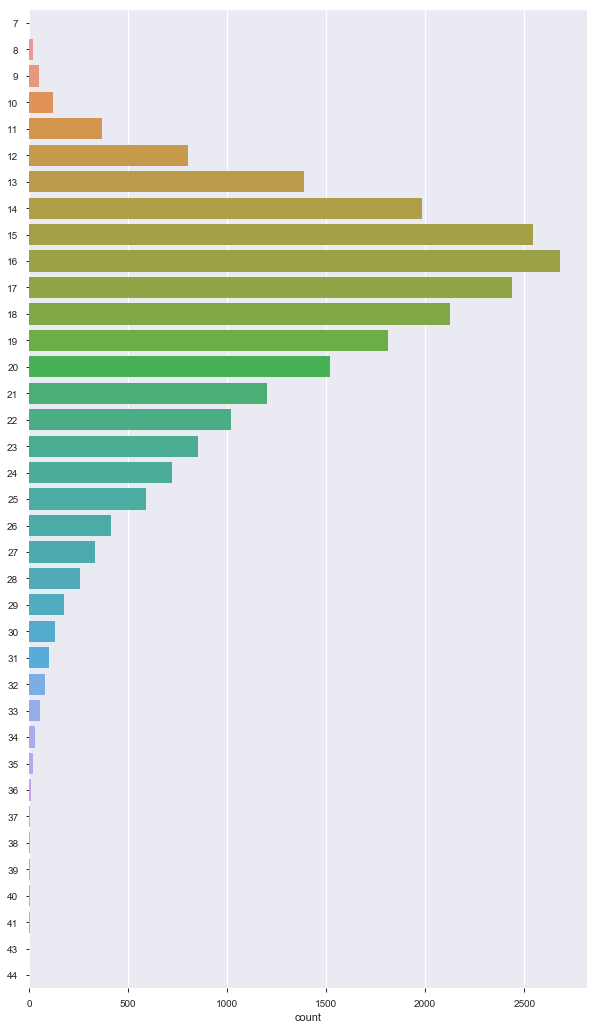

In [24]:
plt.subplots(figsize=(10, 18))
sns.countplot(y=patterns_length_counts);